# Methods for Data Science: Coursework 1

# Grade: 119/125 

<img src="https://github.com/yanismiraoui/yanismiraoui.github.io/blob/master/static/media/yanis_greeting.c3fdd1ec.png?raw=true" width="200px"/>

##### My personal portfolio: https://yanismiraoui.github.io/#/

##### Email: yanis.miraoui19@imperial.ac.uk

### CID: 01731821

Before starting any tasks, we first import the necessary and authorised libraries in order to complete the coursework. We also set the plotting parameters for better readability for our figures.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict

# Set seed for reproducibility (with my CID number)
np.random.seed(1731821)


# Set plotting parameters for readability
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Task 1:  Regression (50 marks)



#### 1.1 Linear regression (8 marks)  

1.1.1

Our first task is to obtain a linear regression model to predict the "Sound Pressure" variable. The first step is to load the dataset and check its content. As the variables are on different scale, we decide to standardise the train and test sets. We make sure to standardise both sets together and then split them again.
We then define the linear regression model and fit it to the training set. We then predict the values of the train set and compute the in-sample mean squared error and $R^2$ score.

In [2]:
# Load the train dataset and define X_train and y_train
airfoil_df = pd.read_csv('airfoil_noise_samples.csv')
X_train = airfoil_df.iloc[:, :-1].values # all rows, all columns except last
y_train = airfoil_df.iloc[:, -1].values # all rows, last column only
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
airfoil_df.head()

X_train shape:  (3890, 6)
y_train shape:  (3890,)


,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
0,2175.611424,15.138865,21.075119,0.088194,66.764401,0.044771,122.365215
1,2962.923620,13.400893,13.200889,0.048462,78.221903,0.011041,129.296236
2,4430.810843,2.164599,13.959536,0.226743,57.053201,0.011499,121.827380
3,4939.695645,13.857682,18.203793,0.021705,23.896377,0.021475,114.998132
4,2193.979785,9.298757,11.007713,0.052737,38.917034,0.001741,125.639641


In [3]:
# Load the test dataset and define X_test and y_test
airfoil_test_df = pd.read_csv('airfoil_noise_test.csv')
X_test = airfoil_test_df.iloc[:, :-1].values # all rows, all columns except last
y_test = airfoil_test_df.iloc[:, -1].values # all rows, last column
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
airfoil_test_df.head()

X_test shape:  (973, 6)
y_test shape:  (973,)


,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
0,1143.654418,12.783087,15.277127,0.110389,46.089548,0.024076,125.332111
1,619.208992,4.460285,16.198696,0.284357,36.728360,0.004000,122.801183
2,646.114737,2.521952,7.533605,0.072292,59.498237,0.003590,129.361188
3,1246.777461,8.438129,12.396435,0.034411,47.557277,0.002407,125.656263
4,286.200927,12.238350,20.877161,0.082437,72.786590,0.036883,124.241736


In [4]:
# Table of summary statistics for each feature
airfoil_df.describe()

,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
count,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000
mean,2941.719410,8.231085,13.552404,0.139788,51.407874,0.014286,123.970283
std,2782.566725,5.568032,4.693427,0.092304,16.438326,0.013974,4.775422
min,0.337305,0.001490,0.045842,0.000124,14.877552,0.000002,102.372432
25%,1044.921326,3.607908,10.655041,0.061642,36.962810,0.004142,120.890188
50%,2102.066627,7.486780,13.829518,0.125007,48.562733,0.008539,124.111408
75%,3976.531005,12.052639,16.810048,0.213330,67.863088,0.020909,127.204799
max,20884.888380,25.747061,26.970685,0.394016,87.053832,0.066562,140.469281


In [5]:
# Preprocess the dataset by standardising the features
# We use the standardise function from Coding Task 5
#https://bb.imperial.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_34968_1&content_id=_2709743_1
def standardise(X):
    """
    Standardise the dataset X

    Parameters:
        X : numpy.ndarray 
            The dataset to standardise
    
    Returns:
        X_std : numpy.ndarray
            The standardised dataset
    """
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_std = (X - mu) / sigma
    return X_std

# Combine both datasets and standardise them
X =  np.vstack([X_train, X_test])
X_std = standardise(X)

# Split again the standardised dataset into train and test
X_train_std = X_std[:X_train.shape[0], :]
X_test_std = X_std[X_train.shape[0]:, :]

In [6]:
# Add intercept to X_train and X_test
X_train_intercept = np.hstack((np.ones((X_train_std.shape[0], 1)), X_train_std)) # add intercept
X_test_intercept = np.hstack((np.ones((X_test_std.shape[0], 1)), X_test_std)) # add intercept

In [7]:
# Use function already defined in Coding Task 2 to compute the maximum likelihood estimate: 
# https://bb.imperial.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_34968_1&content_id=_2709712_1
def max_lik_estimate(X, y):
    """
    Computes the maximum likelihood estimate of the parameters of a linear model

    Parameters:
        X : numpy.ndarray
            N x D matrix of training inputs
        y : numpy.ndarray
            N x 1 vector of training targets/observations
    
    Returns:
        numpy.ndarray
            D x 1 vector of weights (equivalent to MSE solution)
    """
    N, D = X.shape
    beta_ml = np.linalg.solve(X.T @ X, X.T @ y)
    return beta_ml

In [8]:
# Fit the linear regression model
w_linear = max_lik_estimate(X_train_intercept, y_train)

# Report the trained model parameters
print("Trained model parameters: ", w_linear)

# In-sample average mean squared errors (MSE) and R2 score for the dataset
y_pred = np.dot(X_train_intercept, w_linear)
print("In-sample MSE: ", np.mean((y_train - y_pred) ** 2))
print("In-sample R2 score: ", 1 - np.sum((y_train - y_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))


Trained model parameters:  [ 1.23982546e+02 -3.54906581e+00  8.35569710e-01 -3.90500768e+00
 -7.85389236e-02  1.71472026e+00 -1.35742442e-02]
In-sample MSE:  1.8755566396402024
In-sample R2 score:  0.9177343977263076


We would like to find the optimal $\beta$ that will minimise the loss function given. Solving the equation and finding $dL/d\beta$ equal to 0 is equivalent to computing the maximum likelihood estimator. We can then use the formula given in the lecture slides to find the optimal $\beta$.

We have achieved to fit a performant linear regression. Indeed, we obtained a very high $R^2$ score of 0.92 and a low mean squared error of 1.88. This means that the model is able to explain 92% of the variance of the data. The model is also able to predict the values of the train set with a low error. However, so far, we have not tested the model on the test set. We will do so in the next section.

1.1.2

In this section, we are tasked to predict the values of the test set and compute the out-of-sample mean squared error and $R^2$ score. 

In [9]:
# Test model on the test dataset
y_pred_test = np.dot(X_test_intercept, w_linear)

# Report the test out-of-sample MSE and R2 score
print("Out-of-sample test MSE: ", np.mean((y_test - y_pred_test) ** 2))
print("Out-of-sample test R2 score: ", 1 - np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

Out-of-sample test MSE:  1.9843895771191606
Out-of-sample test R2 score:  0.9083172459581621


In [10]:
# Create table with the results for train and test sets for better visualisation and comparison
results_linear = pd.DataFrame({'MSE': [np.mean((y_train - y_pred) ** 2), np.mean((y_test - y_pred_test) ** 2)],
                        'R2 score': [1 - np.sum((y_train - y_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2),
                                        1 - np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)]},
                        index=['Train', 'Test'])
print("Results for train and test sets for linear regression:")
results_linear


Results for train and test sets for linear regression:


,MSE,R2 score
Train,1.875557,0.917734
Test,1.984390,0.908317


We first predict the values of the test set and then compute the out-of-sample mean squared error and $R^2$ score. We obtain a $R^2$ score of 0.91 and a mean squared error of 1.99. This means that the model is able to explain 91% of the variance of the data. The model is also able to predict the values of the test set with a low error. However, we can see that the model is not as good as the one we obtained on the train set. This could be due to the fact that the model has been optimized on the train set only. This could also be due to the fact that the model is overfitting the training data, thus only detecting trends specific to the training set. We will try to reduce this overfitting in the next sections.

#### 1.2 Lasso regression (12 marks) 

1.2.1

This time, we want to fit and optimize a lasso regression model on our dataset. We first define the lasso regression model and fit it to the training set via gradient descent. We then employ a 5 fold cross validation to find the best value of the regularization parameter $\lambda$. We tune our parameter $\lambda$ between 0.0001 and 0.001 using the MSE as a scoring metric. During this investigation, we make sure that the regularization do not apply to the intercept.

Moreover, as indicated in the lectures (Lecture of the 13th February), we could use our previously computed weights to initialize the lasso regression model. This will help the model to converge faster.

We use the following derivations for our function: $$\frac{dL}{d\beta} = -\frac{1}{N}X^{T}(y-\hat{y})+\lambda  sign{(\beta)}$$

We make sure that the intercept is not included in the regularization. Thus, we also use the following update rule: $$\frac{dL}{d\beta_{0}}=-\frac{1}{N}\sum_{i=1}^{N}(y-\hat{y})$$

In [11]:
# We define a function for Lasso regression via gradient descent (with L1 regularization)
# NB: We do not penalise the bias term
def lasso_regression(X, y, lam=0.1, max_iter=10000, tol=1e-8, informed_weights=None,verbose=False):
    """
    Lasso regression via gradient descent (with L1 regularization)

    Parameters:
        X : numpy.ndarray
            N x D matrix of training inputs
        y : numpy.ndarray
            N x 1 vector of training targets/observations
        lam : float
            Regularization parameter
        max_iter : int
            Maximum number of iterations
        tol : float
            Tolerance for convergence
        informed_weights : numpy.ndarray
            D x 1 vector of informed weightss
        verbose : bool
            Whether to print the loss at each iteration
    
    Returns:
        weights : numpy.ndarray
            D x 1 vector of weights
        bias : float
            Bias term
    """
    m, n = X.shape
    # Initialise weights and bias
    if informed_weights is None:
        weights = np.random.randn(n)
        bias = np.random.randn(1)
    else:
        weights = informed_weights[1:]
        bias = informed_weights[0]
    converged = False
    iteration = 0
    prev_loss = 0
    
    while not converged and iteration < max_iter:
        learning_rate =  (1/(iteration + 1))*15
        y_pred = np.dot(X, weights) + bias
        # Compute loss and gradients
        loss = (1/(2*m))*sum((y - y_pred) ** 2) + lam * np.sum(np.abs(weights))
        grad_w = -1 / m * np.dot(X.T, y - y_pred) + lam * np.sign(weights)
        grad_b = -1 / m * np.sum(y - y_pred)
        # Update weights and bias
        weights -= learning_rate * grad_w
        bias -= learning_rate * grad_b
        # Update iteration number
        iteration += 1
        if iteration % 1000 == 0 and verbose:
            print("Iteration: {}, Loss: {:.4f}".format(iteration, loss))
        # Check for convergence
        if abs(prev_loss-loss) < tol:
            if verbose:
                print("Iteration: {}, Loss: {:.4f}".format(iteration, loss))
                print("Converged")
            converged = True
        prev_loss = loss
    return weights, bias

# We train a model to test that our algorithm works for a given lambda
num_iterations = 50000
lam = 0.05
print("Lasso regression with lambda = ", lam)
print("Number of iterations = ", num_iterations)
w, bias = lasso_regression(X_train_std, y_train, lam, max_iter=num_iterations, informed_weights=w_linear, verbose=True)

# Report the trained model parameters
print("Trained model parameters: ", w, bias)
    

Lasso regression with lambda =  0.05
Number of iterations =  50000
Iteration: 1000, Loss: 1.4283
Iteration: 2000, Loss: 1.4283
Iteration: 2570, Loss: 1.4283
Converged
Trained model parameters:  [-3.49124508e+00  5.42730332e-01 -3.64482045e+00 -2.00642346e-01
  1.65836073e+00  1.22230151e-04] 123.98308809542276


In [12]:
# Tune the lambda parameter using 5 fold cross-validation

# Shuffle the dataset
p = np.random.permutation(len(y_train))
X_train_std_shuffled = X_train_std[p]
y_train_shuffled = y_train[p]

# Five fold cross-validation indexes
folds_indexes = np.split(np.arange(len(y_train)), 5)

# Define the lambda values to try
lam_values = np.linspace(0.0001, 0.001, 20)
num_iterations = 20000
store = {}
for lam in lam_values:
    print("Lasso regression with lambda = ", lam)
    # Five fold cross-validation
    store_mse = []
    store_r2 = []
    for k in range(5):
        # Split the dataset into training and validation sets
        val_indexes = folds_indexes[k]
        train_indexes = list(set(range(y_train_shuffled.shape[0])) - set(val_indexes))
        X_train_cv = X_train_std_shuffled[train_indexes]
        y_train_cv = y_train_shuffled[train_indexes]
        X_val_cv = X_train_std_shuffled[val_indexes]
        y_val_cv = y_train_shuffled[val_indexes]
        # Train the model
        w, bias = lasso_regression(X_train_std_shuffled, y_train_shuffled, lam, max_iter=num_iterations, informed_weights=w_linear)
        # Evaluate the model on the validation set
        y_pred = np.dot(X_val_cv, w) + bias
        # Report the validation MSE and R2 score
        store_mse.append(np.mean((y_val_cv - y_pred) ** 2))
        store_r2.append(1 - np.sum((y_val_cv - y_pred) ** 2) / np.sum((y_val_cv - np.mean(y_val_cv)) ** 2))

    #Store the average validation MSE and R2 score
    store[lam] = tuple([np.mean(store_mse), np.mean(store_r2)])
    print("Validation MSE: ", np.mean(store_mse))


Lasso regression with lambda =  0.0001
Validation MSE:  1.875559176883561
Lasso regression with lambda =  0.00014736842105263158
Validation MSE:  1.875555981616126
Lasso regression with lambda =  0.00019473684210526317
Validation MSE:  1.8755558414845452
Lasso regression with lambda =  0.00024210526315789473
Validation MSE:  1.8755532849798169
Lasso regression with lambda =  0.00028947368421052634
Validation MSE:  1.8755361884754571
Lasso regression with lambda =  0.0003368421052631579
Validation MSE:  1.8755340164743088
Lasso regression with lambda =  0.00038421052631578946
Validation MSE:  1.8755573804336811
Lasso regression with lambda =  0.0004315789473684211
Validation MSE:  1.8755700277675262
Lasso regression with lambda =  0.00047894736842105264
Validation MSE:  1.8755564797890312
Lasso regression with lambda =  0.0005263157894736842
Validation MSE:  1.8755342836433386
Lasso regression with lambda =  0.0005736842105263159
Validation MSE:  1.8755573214568326
Lasso regression with

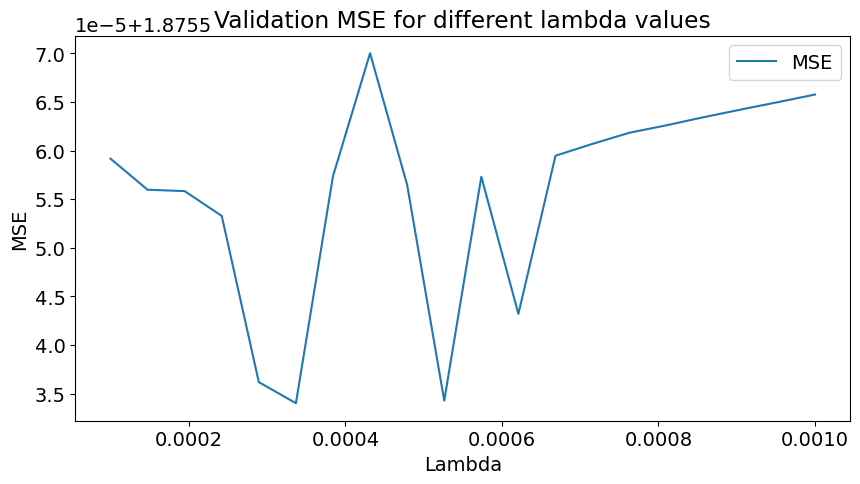

In [13]:
# Plot the validation MSE for different lambda values
plt.figure(figsize=(10, 5))
plt.plot(list(store.keys()), [store[k][0] for k in store.keys()], label='MSE')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.title('Validation MSE for different lambda values')
plt.show()

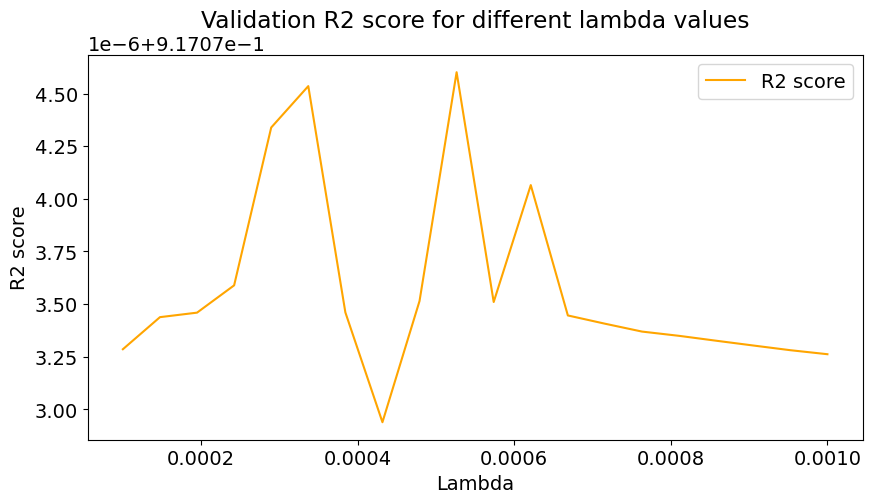

In [14]:
# Plot the validation R2 score for different lambda values
plt.figure(figsize=(10, 5))
plt.plot(list(store.keys()), [store[k][1] for k in store.keys()], label='R2 score', color='orange')
plt.xlabel('Lambda')
plt.ylabel('R2 score')
plt.legend()
plt.title('Validation R2 score for different lambda values')
plt.show()

In [15]:
# Optimal lambda and associated validation MSE and R2 score
optimal_lambda = min(store, key=store.get)
print("Optimal lambda: ", min(store, key=store.get))
print("Validation MSE: ", store[min(store, key=store.get)][0])
print("Validation R2 score: ", store[min(store, key=store.get)][1])

Optimal lambda:  0.0003368421052631579
Validation MSE:  1.8755340164743088
Validation R2 score:  0.9170745351395988


We have successfully found the best value of the regularization parameter $\lambda$ to be around 0.00034 using 5 fold cross validation. Using the plots, we notice that the MSE is the lowest and the $R^2$ score is the highest when $\lambda$ is around 0.00034.

1.2.2

We choose one training/validation split and retrain our model using different lasso penalties (first split). We then visualise the parameters $\beta$ as function of the lasso penalty.

In [16]:
# Select the first split for training and validation
val_indexes = folds_indexes[0]
train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
X_train_cv = X_train_std_shuffled[train_indexes]
y_train_cv = y_train_shuffled[train_indexes]
X_val_cv = X_train_std_shuffled[val_indexes]
y_val_cv = y_train_shuffled[val_indexes]

# Visualise the inferred parameters beta as a function of the Lasso penalty
lam_values = np.linspace(0.0001, 3, 30)
num_iterations = 20000
store = {}
for lam in lam_values:
    print("Lasso regression with lambda = ", lam)
    # Train the model
    w, bias = lasso_regression(X_train_cv, y_train_cv, lam, max_iter=num_iterations)
    # Store the model parameters
    store[lam] = w


Lasso regression with lambda =  0.0001
Lasso regression with lambda =  0.1035448275862069
Lasso regression with lambda =  0.20698965517241377
Lasso regression with lambda =  0.3104344827586207
Lasso regression with lambda =  0.41387931034482756
Lasso regression with lambda =  0.5173241379310345
Lasso regression with lambda =  0.6207689655172414
Lasso regression with lambda =  0.7242137931034482
Lasso regression with lambda =  0.8276586206896551
Lasso regression with lambda =  0.931103448275862
Lasso regression with lambda =  1.034548275862069
Lasso regression with lambda =  1.1379931034482758
Lasso regression with lambda =  1.2414379310344827
Lasso regression with lambda =  1.3448827586206895
Lasso regression with lambda =  1.4483275862068965
Lasso regression with lambda =  1.5517724137931033
Lasso regression with lambda =  1.6552172413793103
Lasso regression with lambda =  1.7586620689655172
Lasso regression with lambda =  1.862106896551724
Lasso regression with lambda =  1.9655517241

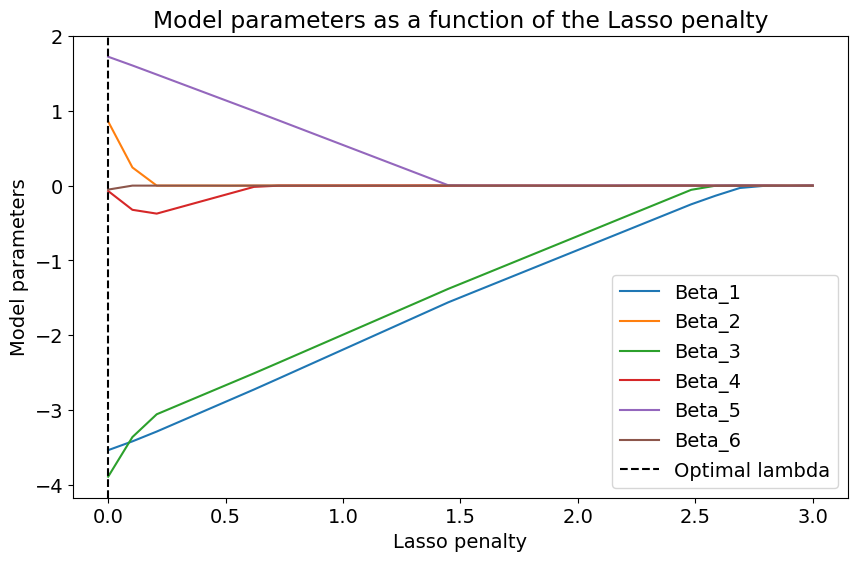

In [17]:
# Plot the model parameters as a function of the Lasso penalty
plt.figure(figsize=(10, 6))
for i in range(X_train_cv.shape[1]):
    plt.plot(list(store.keys()), [store[lam][i] for lam in store.keys()], label="Beta_" + str(i+1))
# Add a dashed line at optimal lambda for visualisation 
plt.axvline(x=optimal_lambda, linestyle='--', color='black', label='Optimal lambda')
plt.xlabel("Lasso penalty")
plt.ylabel("Model parameters")
plt.legend()
plt.title("Model parameters as a function of the Lasso penalty")
plt.show()

We have plotted the parameters $\beta$ as a function of the lasso penalty. 

As the lasso penalty increases, the parameters $\beta$ tend to zero. Lasso regression promotes sparsity as it tends to set the parameters $\beta$ to zero. For example at $\lambda = 2.8$, all parameters $\beta$ are set to zero. This could be interepeted in terms of the bias-variance tradeoff as the model is able to reduce the variance of the model but increasing its bias. This is a good result as it means that we have been able to reduce the overfitting of the model. However, reducing the variance too much will lead to a high bias. This means that the model will not be able to explain the variance of the data. This is why we have to find the best value of the lasso penalty. 

Moreover, we can see that the parameters $\beta$ are not null for all the values of the lasso penalty. This means that the lasso regression model is able to select the most important features.

1.2.3

Using the optimal value found in 1.2.1 for the lasso penalty, we retrain our model on the full training set and compute the in-sample and out-of-sample mean squared error and $R^2$ score. We also compare our results with the ones obtained for $\lambda=0$, the linear regression case.

In [18]:
# Train the model with the optimal lambda value
w, bias = lasso_regression(X_train_std, y_train, optimal_lambda, max_iter=num_iterations)

# Evaluate the model on the train set
y_pred = np.dot(X_train_std, w) + bias

# Report the train MSE and R2 score
print("In-sample train MSE: ", np.mean((y_train - y_pred) ** 2))
print("In-sample train R2 score: ", 1 - np.sum((y_train - y_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))

# Evaluate the model on the test set
y_pred_test = np.dot(X_test_std, w) + bias

# Report the test MSE and R2 score
print("Out-of-sample test MSE: ", np.mean((y_test - y_pred_test) ** 2))
print("Out-of-sample test R2 score: ", 1 - np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))


In-sample train MSE:  1.8755574240344766
In-sample train R2 score:  0.9177343633212324
Out-of-sample test MSE:  1.9842292458676534
Out-of-sample test R2 score:  0.9083246535815778


In [19]:
# Create table with the results for train and test for better visualisation and comparison
results_lasso = pd.DataFrame({'MSE': [np.mean((y_train - y_pred) ** 2), np.mean((y_test - y_pred_test) ** 2)],
                        'R2 score': [1 - np.sum((y_train - y_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2),
                                        1 - np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)]},
                        index=['Train', 'Test'])
print("Results for train and test for the Lasso regression model:")
results_lasso


Results for train and test for the Lasso regression model:


,MSE,R2 score
Train,1.875557,0.917734
Test,1.984229,0.908325


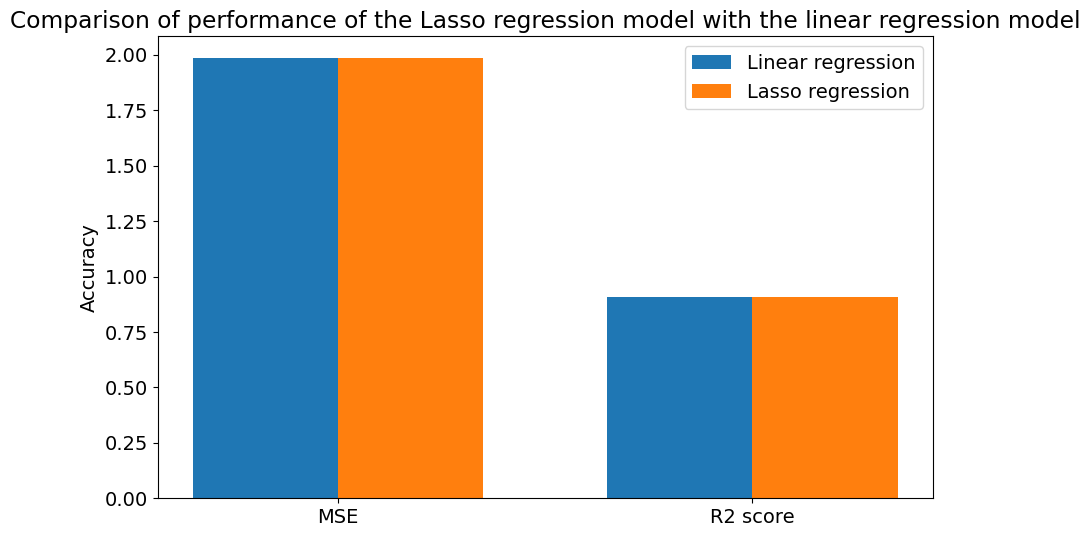

In [20]:
# Plot as a histogram the comparison of performance of the Lasso regression model with the linear regression model
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(2)
width = 0.35
ax.bar(x - width/2, [results_linear.iloc[1,0], results_linear.iloc[1,1]], width, label='Linear regression')
ax.bar(x + width/2, [results_lasso.iloc[1,0], results_lasso.iloc[1,1]], width, label='Lasso regression')
ax.set_xticks(x)
ax.set_xticklabels(["MSE", "R2 score"])
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of performance of the Lasso regression model with the linear regression model")
ax.legend(loc="best")
plt.show()

In [21]:
print("Differrence in Test MSE:", results_linear.iloc[1,0] - results_lasso.iloc[1,0])
print("Differrence in Test R2 score:", results_linear.iloc[1,1] - results_lasso.iloc[1,1])

Differrence in Test MSE: 0.000160331251507273
Differrence in Test R2 score: -7.407623415667253e-06


First of all, we can easily notice that as for the linear regression model, it seems like the model has better results on the train set than on the test set. This is due to the fact that the model has been optimized on the train set only. This is also due to the fact that the model is still slightly overfitting the data. 

On the other hand, when we compare our results with the ones obtained for $\lambda=0$, the linear regression case, we can see that both models perform similarly. The difference of between the MSE and $R^2$ score is very small. Indeed, this could have been expected as the lasso penalty chosen is very small. Still, the lasso regression seems to perform slightly better than the linear regression model on the test set. The lasso regression aims to reduce the variance of the model by minimizing the L1 norm of the parameters $\beta$.

To justify these results, we can plot the out of sample MSE vs the $\lambda$ values ($\lambda$ = 0 included).

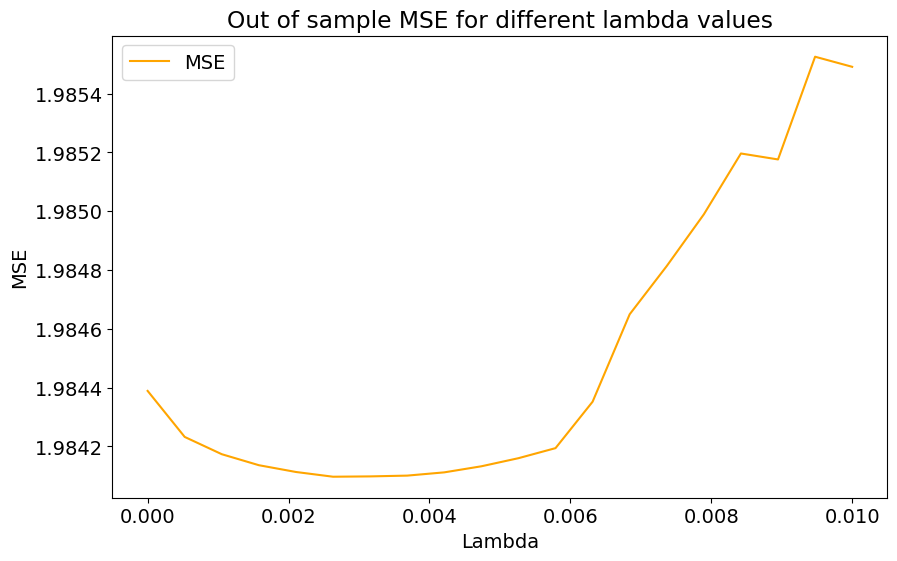

In [22]:
# Plot the out of sample MSE vs lambda values (lambda = 0 included)
mse_store = {}
lam_values = np.linspace(0, 0.01, 20)
for lam in lam_values:
    # Train the model
    w, bias = lasso_regression(X_train_std, y_train, lam, max_iter=num_iterations, informed_weights=w_linear)
    # Evaluate the model on the test set
    y_pred_test = np.dot(X_test_std, w) + bias
    # Store the test MSE
    mse_store[lam] = np.mean((y_test - y_pred_test) ** 2)

plt.figure(figsize=(10, 6))
plt.plot(list(mse_store.keys()), [mse_store[lam] for lam in mse_store.keys()], label='MSE', color='orange')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.title('Out of sample MSE for different lambda values')
plt.show()

#### 1.3 Elastic Nets (20 marks) 
1.3.1

We now want to introduce a new model, the elastic net. We first define the elastic net model and fit it to the training set via gradient descent.

Similarly as before, we use the following derivations for our function:
$$\frac{dL}{d\beta} = -\frac{1}{N}X^{T}(y-\hat{y})+\lambda  (\alpha sign{(\beta)} + 2(1-\alpha)\beta)$$

And for the intercept:
$$\frac{dL}{d\beta_{0}}=-\frac{1}{N}\sum_{i=1}^{N}(y-\hat{y})$$

In [23]:
def elastic_net_regression(X, y, alpha=0.1, lam=0.1, max_iter=10000, tol=1e-9, informed_weights=None, verbose=False):
    """
    Elastic net regression

    Parameters:
        X : numpy array of shape (m, n)
            The input data
        y : numpy array of shape (m,)
            The target values
        alpha : float
            The elastic net mixing parameter
        lam : float
            The regularization parameter
        max_iter : int
            The maximum number of iterations
        tol : float
            The tolerance for the stopping criterion
        informed_weights : numpy array of shape (n,)
            The weights of the previous model (initial weights)
        verbose : bool
            If True, print the loss at each iteration

    Returns:
        weights : numpy array of shape (n,)
            The weights of the model
        bias : float
            The bias of the model
    """
    m, n = X.shape
    if informed_weights is None:
        weights = np.random.randn(n)
        bias = np.random.randn(1)
    else:
        weights = informed_weights[1:]
        bias = informed_weights[0]
    converged = False
    iteration = 0
    prev_loss = 0
    
    while not converged and iteration < max_iter:
        learning_rate =  (1/(iteration + 1))*8
        # Compute the gradient for the elastic net regression
        grad_w = (1/m) * np.dot(X.T, np.dot(X, weights) + bias - y) + (2*lam*alpha/m)*np.sign(weights) + (2*lam*(1-alpha)/m)*weights
        grad_b = (1/m) * np.sum(np.dot(X, weights) + bias - y)
        # Update the weights and bias
        weights -= learning_rate * grad_w
        bias -= learning_rate * grad_b
        # Compute the loss
        loss = (1/(2*m)) * np.sum((np.dot(X, weights) + bias - y) ** 2) + lam*(alpha*np.sum(np.abs(weights)) + (1-alpha)*np.sum(weights**2))
        
        iteration += 1
        if iteration % 1000 == 0 and verbose:
            print("Iteration: {}, Loss: {:.4f}".format(iteration, loss))

        if abs(loss - prev_loss) < tol:
            if verbose:
                print("Converged")
            converged = True
        prev_loss = loss
    return weights, bias

# Testing our function
elastic_net_regression(X_train_std, y_train, alpha=0.1, lam=0.1, max_iter=10000, tol=1e-7, informed_weights=w_linear, verbose=False)


(array([-3.54886693,  0.83463588, -3.90406493, -0.07912108,  1.71460157,
        -0.01364808]),
 123.98254832977364)

We have successfully trained an Elastic net model using our built function with $\alpha = 0.1$ and $\lambda = 0.1$.

1.3.2

We now want to find the best value of the regularization parameters $\lambda$ and $\alpha$ using 5 fold cross validation (grid search). We tune our parameters $\lambda$ and $\alpha$ using the MSE as a scoring metric.

In [24]:
# We conduct a grid search to find the optimal hyperparameters
alpha_values = [0.1, 0.5, 0.9]
lam_values = np.linspace(0.0001, 0.1, 10)
num_iterations = 20000

# Store the validation MSE and R2 score for each combination of hyperparameters
store = {}
store_weights = {}
for alpha in alpha_values:
    print("alpha = ", alpha)
    for lam in lam_values:
        # We use 5-fold cross validation
        store_mse = []
        store_r2 = []
        for fold in range(5):
            # Get the train and validation sets
            val_indexes = folds_indexes[fold]
            train_indexes = list(set(range(y_train_shuffled.shape[0])) - set(val_indexes))
            X_train_cv = X_train_std_shuffled[train_indexes]
            y_train_cv = y_train_shuffled[train_indexes]
            X_val_cv = X_train_std_shuffled[val_indexes]
            y_val_cv = y_train_shuffled[val_indexes]
            # Train the model
            w, bias = elastic_net_regression(X_train_std_shuffled, y_train_shuffled, alpha, lam, max_iter=num_iterations, informed_weights=w_linear)
            # Evaluate the model on the validation set
            y_pred = np.dot(X_val_cv, w) + bias
            # Report the validation MSE and R2 score
            store_mse.append(np.mean((y_val_cv - y_pred) ** 2))
            store_r2.append(1 - np.sum((y_val_cv - y_pred) ** 2) / np.sum((y_val_cv - np.mean(y_val_cv)) ** 2))
        store[(alpha, lam)] = (np.mean(store_mse), np.mean(store_r2))
    optimal_lambda = min(store, key=store.get)
    print("Optimal hyperparameter lambda: ", optimal_lambda[1])
    #retrain the model with the optimal hyperparameters
    w, bias = elastic_net_regression(X_train_std, y_train, optimal_lambda[0], optimal_lambda[1], max_iter=num_iterations)
    store_weights[alpha] = (w, bias)

alpha =  0.1
Optimal hyperparameter lambda:  0.0001
alpha =  0.5
Optimal hyperparameter lambda:  0.0112
alpha =  0.9
Optimal hyperparameter lambda:  0.0001


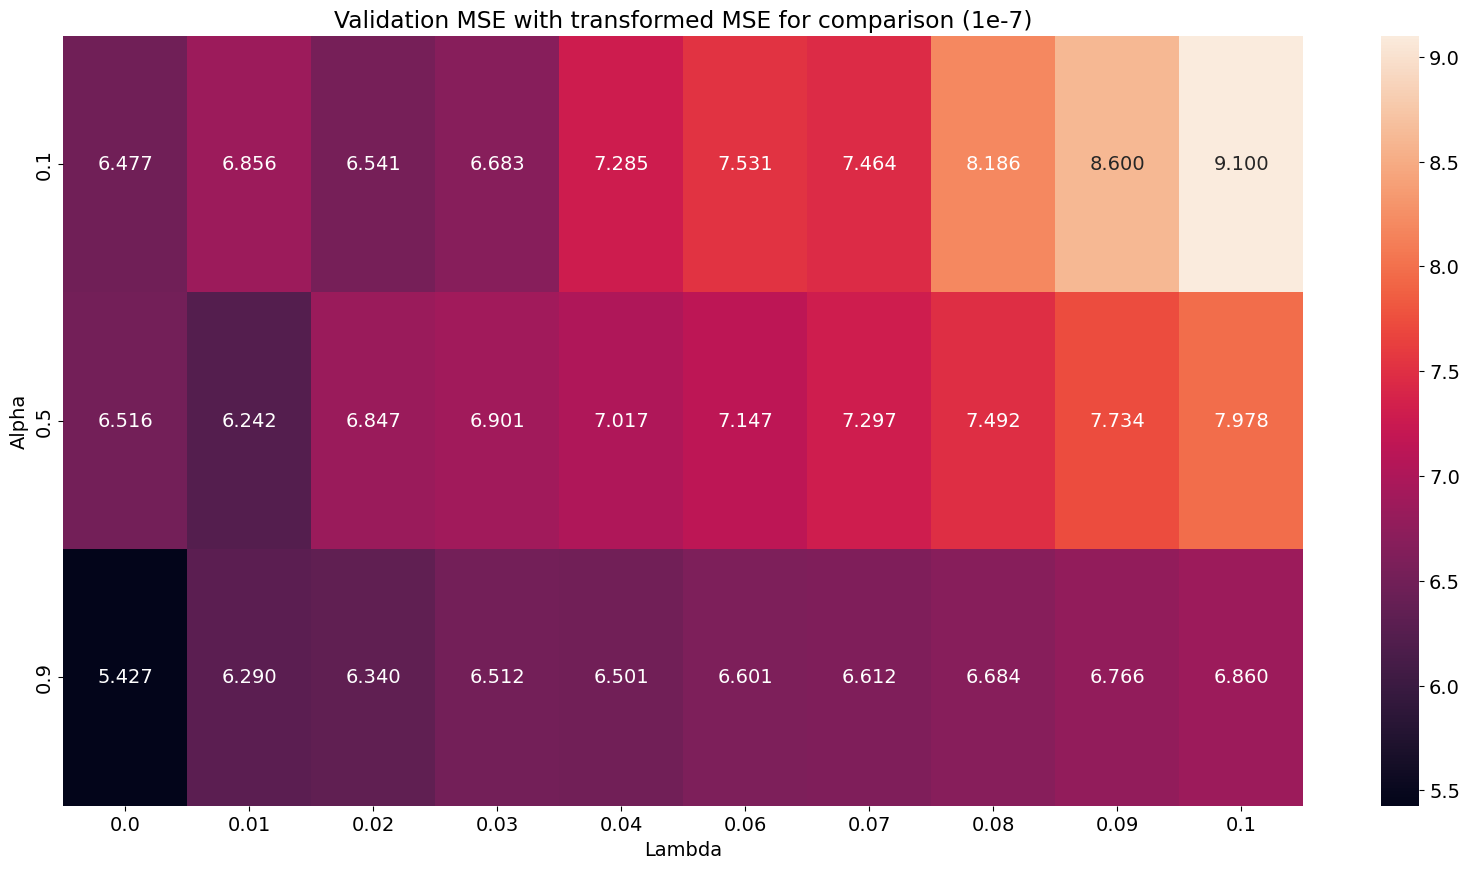

In [25]:
# Plot grid search results with transformed MSE for better visualisation and comparison
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(((np.array(list(store.values()))[:, 0].reshape(len(alpha_values), len(lam_values)))-1.875556)*1e7, annot=True, fmt=".3f", xticklabels=[round(x,2) for x in lam_values], yticklabels=alpha_values, ax=ax)
ax.set_xlabel('Lambda')
ax.set_ylabel('Alpha')
ax.set_title('Validation MSE with transformed MSE for comparison (1e-7)')
plt.show()

In [26]:
# Compute out of sample MSE and R2 score
store_elastic_net = {}
for alpha in alpha_values:
    w, bias = store_weights[alpha]
    y_pred = np.dot(X_test_std, w) + bias
    mse = np.mean((y_test - y_pred) ** 2)
    r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
    print("alpha = ", alpha)
    print("Test MSE: ", mse)
    print("Test R2 score: ", r2)
    store_elastic_net[alpha] = (mse, r2)

alpha =  0.1
Test MSE:  1.984366386024777
Test R2 score:  0.9083183174329506
alpha =  0.5
Test MSE:  1.9844227167537396
Test R2 score:  0.9083157148409858
alpha =  0.9
Test MSE:  1.984670585333388
Test R2 score:  0.9083042628185177


In [27]:
# Create table with the results for train and test sets for better visualisation and comparison
results_elastic = pd.DataFrame(store_elastic_net, index=["MSE", "R2 score"])
results_elastic.columns = ["alpha = 0.1", "alpha = 0.5", "alpha = 0.9"]
results_elastic

,alpha = 0.1,alpha = 0.5,alpha = 0.9
MSE,1.984366,1.984423,1.984671
R2 score,0.908318,0.908316,0.908304


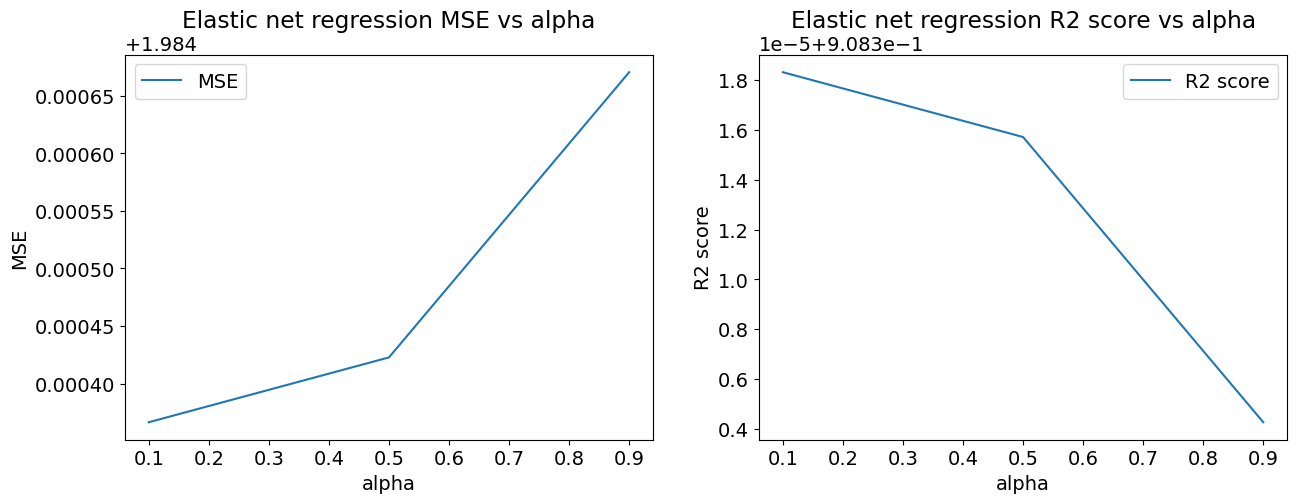

In [28]:
# Plot the results separately for MSE and R2
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(alpha_values, [store_elastic_net[alpha][0] for alpha in alpha_values], label="MSE")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("MSE")
ax[0].title.set_text("Elastic net regression MSE vs alpha")
ax[0].legend()

ax[1].plot(alpha_values, [store_elastic_net[alpha][1] for alpha in alpha_values], label="R2 score")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("R2 score")
ax[1].title.set_text("Elastic net regression R2 score vs alpha")
ax[1].legend()
plt.show()



Using this grid search and the resulting plots, we can see that the best value of the regularization parameters $\lambda$ and $\alpha$ are around 0.0001 and 0.9 respectively. Indeed, these hyperparameters give us the best performance for our elastic net model based on our cross validation results. Indeed, even if the performance seems to be better for different alpha values on the test set, we should never choose our hyperparameters based on the performance of our model on the test set. Indeed, cross-validation is trying to minimise the empirical error, on the training data, and not the 'true' error, or even an error that could hypothetically arise from a hypothetical larger data set. So, there will be cases where the cross-validated lambda then does not do well on the test set. Cross-validation is indeed trying to prevent overfitting, but that still doesn't mean that it will always work. Therefore, we still keep the hyperparameters found by the grid search.


1.3.3

Finally, we aim to visualise the inferred parameters with the optimal value of the regularization parameters $\lambda$ and for different values of $\alpha$.

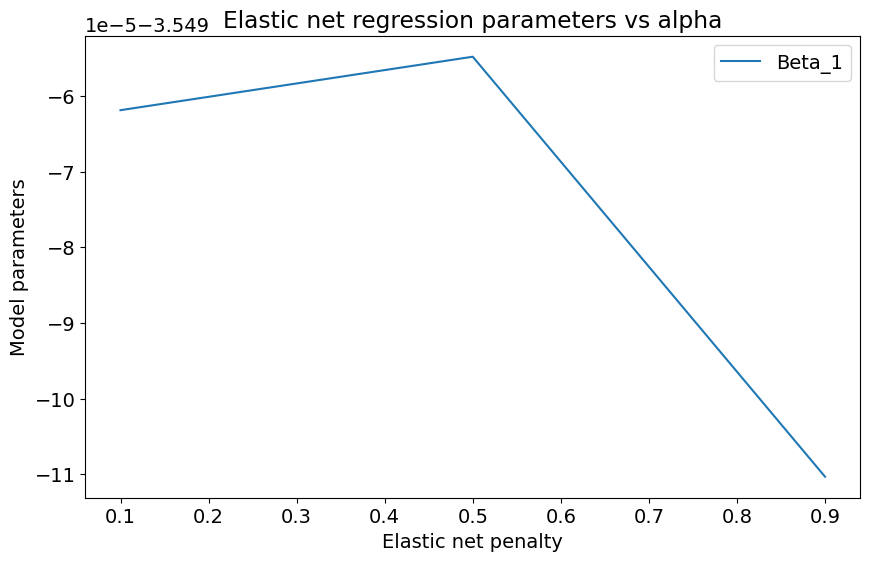

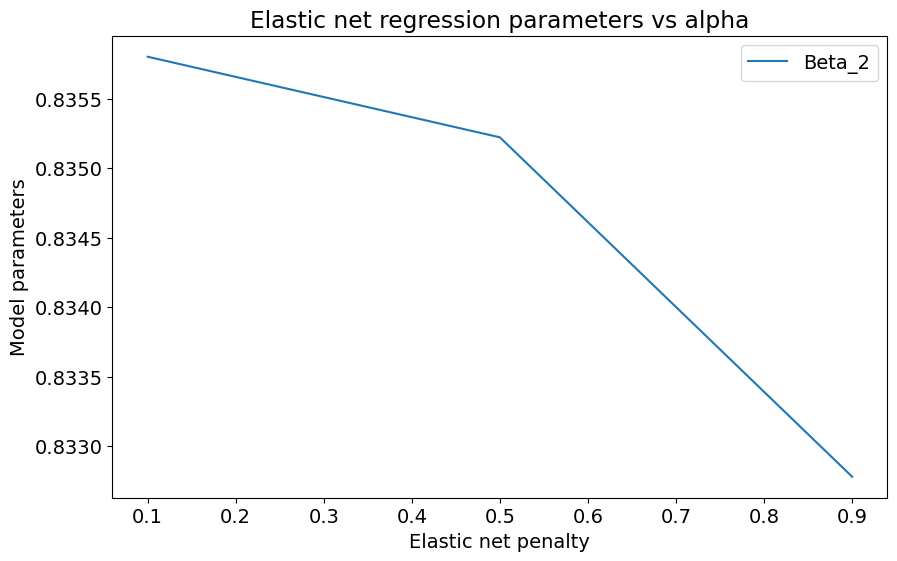

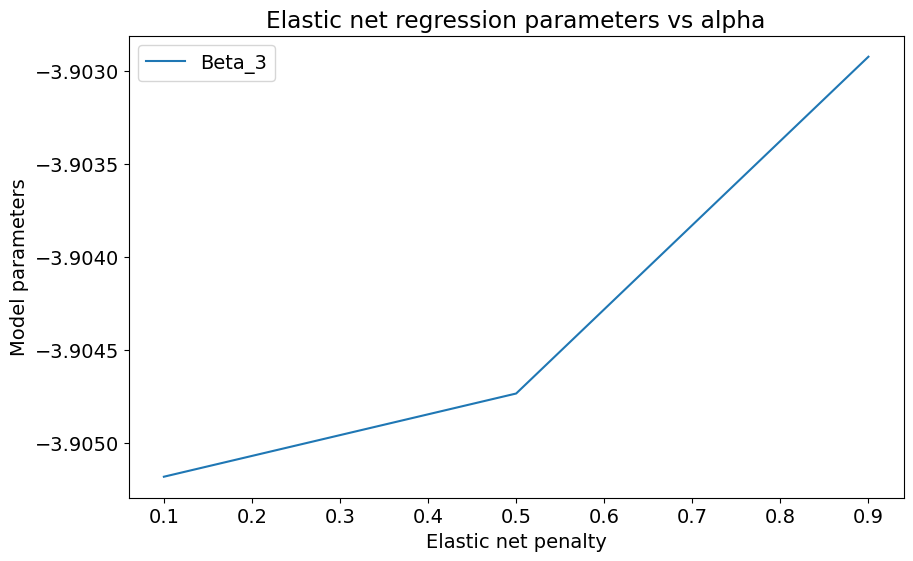

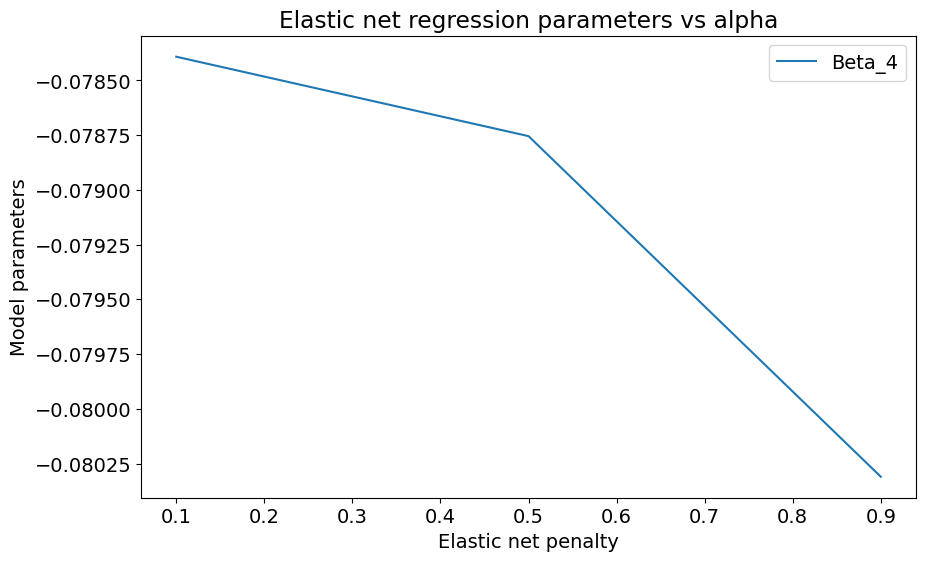

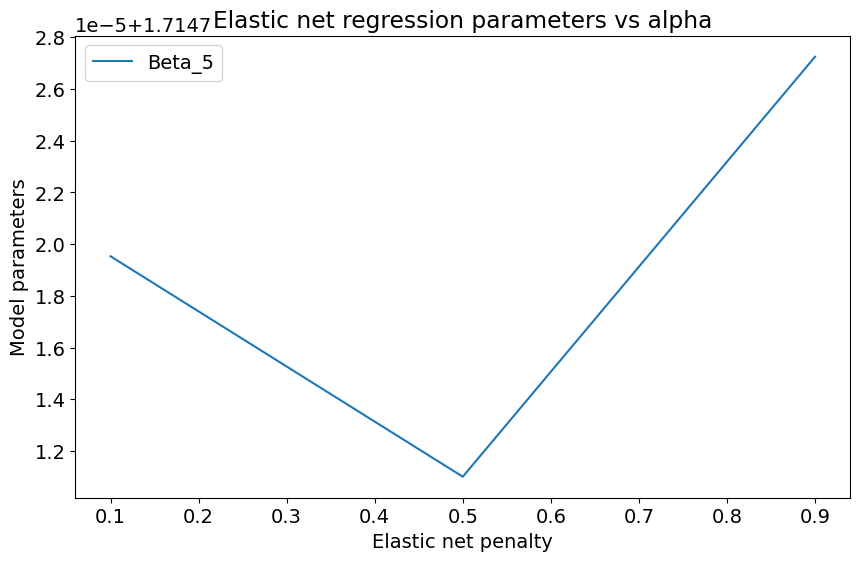

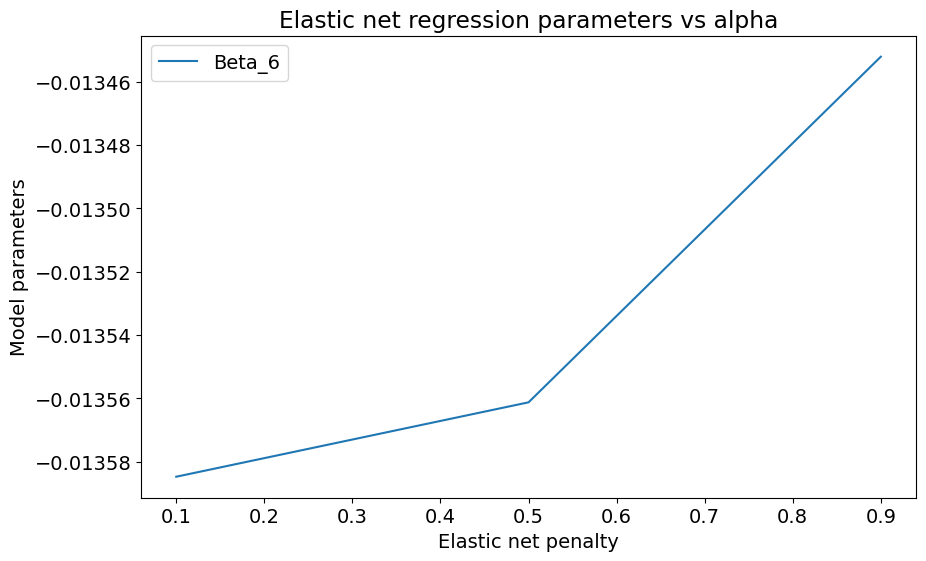

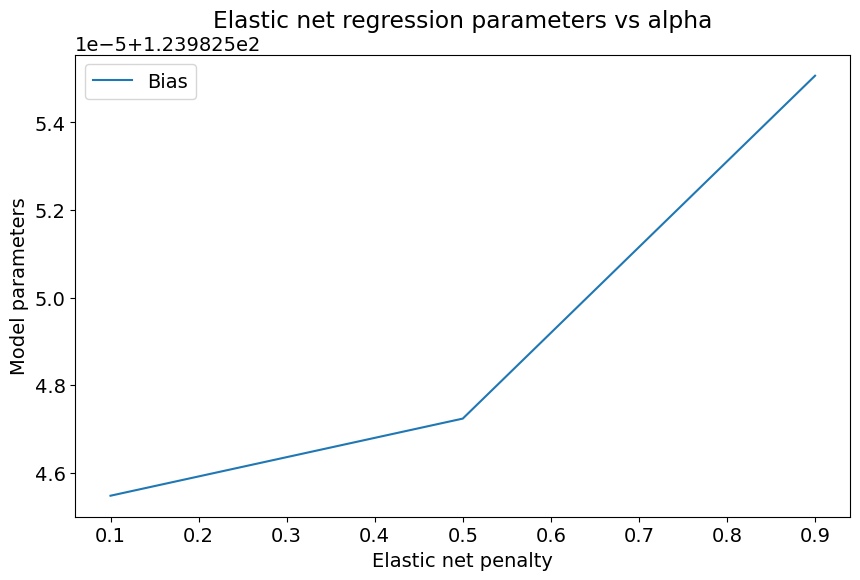

In [29]:
# Visualise the inferred parameters with the optimal lambda for each value of alpha
alpha_values = [0.1, 0.5, 0.9]
for beta in range(X_train_std.shape[1]):
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, [store_weights[alpha][0][beta] for alpha in alpha_values], label="Beta_" + str(beta+1))
    plt.xlabel("Elastic net penalty")
    plt.ylabel("Model parameters")
    plt.legend()
    plt.title("Elastic net regression parameters vs alpha")
    plt.show()

# Plot bias 
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, [store_weights[alpha][1] for alpha in alpha_values], label="Bias")
plt.xlabel("Elastic net penalty")
plt.ylabel("Model parameters")
plt.legend()
plt.title("Elastic net regression parameters vs alpha")
plt.show()


From these plots, a clear pattern emerges. The L1 norm of each parameter $\beta$ is decreasing as $\alpha$ increases and similarly the L2 norm of each parameter $\beta$ is increasing as $\alpha$ increases. In fact, a parameter that is negative but smaller than -1 will tend to decrease as $\alpha$ increases. Similarly, a parameter that is positive but larger than 1 will tend to increase as $\alpha$ increases.

On the other hand, for $\alpha=0$, we have the ridge regression model whereas when $\alpha=1$, we have the lasso regression model. This means that the elastic net model is able to combine the advantages of both models. Indeed, the elastic net model is able to reduce the overfitting of the model while being able to select the most important features. Even though, all three values of alpha give us good results overall, the elastic net model with $\alpha=0.1$ seems to give us the best results.

#### 1.4 kNN regression (10 marks)
1.4.1

The last regression model that we consider is the kNN regression model. We first define the kNN regression model and fit it to the training set. We then employ a 5 fold cross validation to find the best value of the number of neighbors $k$. We tune our parameter $k$ between 1 and 45 using the MSE as a scoring metric.

In [30]:
# Euclidean distance function from Coding Task 3 Tutorial
#https://bb.imperial.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_34968_1&content_id=_2709622_1
def euclidian_distance(p, q):
    """
    Compute the Euclidean distance between two points.

    Parameters:
        p : numpy array
            First point.  
        q : numpy array
            Second point.
    
    Returns:
        float
            Euclidean distance between p and q.
    """
    return np.sqrt(np.sum((p-q)**2, axis=1)) 

In [31]:
# KNN regression function from Coding Task 3 Tutorial
#https://bb.imperial.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_34968_1&content_id=_2709622_1
def k_neighbours(X_train, X_test, k=5, return_distance=False):
    """
    Compute the k nearest neighbours for each point in X_test.

    Parameters:
        X_train : numpy array
            Training data.
        X_test : numpy array
            Test data.
        k : int
            Number of nearest neighbours to return.

    Returns:
        numpy array
            Distances to k nearest neighbours.
        numpy array
            Indices of k nearest neighbours.
    """
    n_neighbours = k
    dist = []
    neigh_ind = []

    # compute distance from each point x_test in X_test to all points in X_train
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test]

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)

    # return distances together with indices of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)

    return np.array(neigh_ind)

In [32]:
# Grid search for the optimal k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45]
store = {}
for k in k_values:
    store_mse = []
    store_r2 = []
    for fold in range(5):
        # Get the train and validation sets
        val_indexes = folds_indexes[fold]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
        X_train_cv = X_train_std[train_indexes]
        y_train_cv = y_train[train_indexes]
        X_val_cv = X_train_std[val_indexes]
        y_val_cv = y_train[val_indexes]
        # Train the model
        y_pred = k_neighbours(X_train_cv, X_val_cv, k)
        # Evaluate the model on the validation set
        y_pred = np.mean(y_train_cv[y_pred], axis=1)
        # Report the validation MSE and R2 score
        store_mse.append(np.mean((y_val_cv - y_pred) ** 2))
        store_r2.append(1 - np.sum((y_val_cv - y_pred) ** 2) / np.sum((y_val_cv - np.mean(y_val_cv)) ** 2))
    print("KNN regression with k = ", k)
    print("Validation MSE: ", np.mean(store_mse))
    print("Validation R2 score: ", np.mean(store_r2))
    store[k] = np.mean(store_mse)

KNN regression with k =  1
Validation MSE:  5.201119552986009
Validation R2 score:  0.7713103771800567
KNN regression with k =  3
Validation MSE:  3.387034540971593
Validation R2 score:  0.8512443591140004
KNN regression with k =  5
Validation MSE:  3.080239598227511
Validation R2 score:  0.8647341075541576
KNN regression with k =  7
Validation MSE:  3.0214999170114787
Validation R2 score:  0.8672238459978445
KNN regression with k =  9
Validation MSE:  3.010001965894285
Validation R2 score:  0.8677284787604093
KNN regression with k =  11
Validation MSE:  3.009886505660207
Validation R2 score:  0.8677749432179154
KNN regression with k =  13
Validation MSE:  3.0214424281461527
Validation R2 score:  0.8672770387092907
KNN regression with k =  15
Validation MSE:  3.0527852399929616
Validation R2 score:  0.8659414011313039
KNN regression with k =  17
Validation MSE:  3.0750776819997037
Validation R2 score:  0.8649743792218544
KNN regression with k =  19
Validation MSE:  3.099951409391834
Va

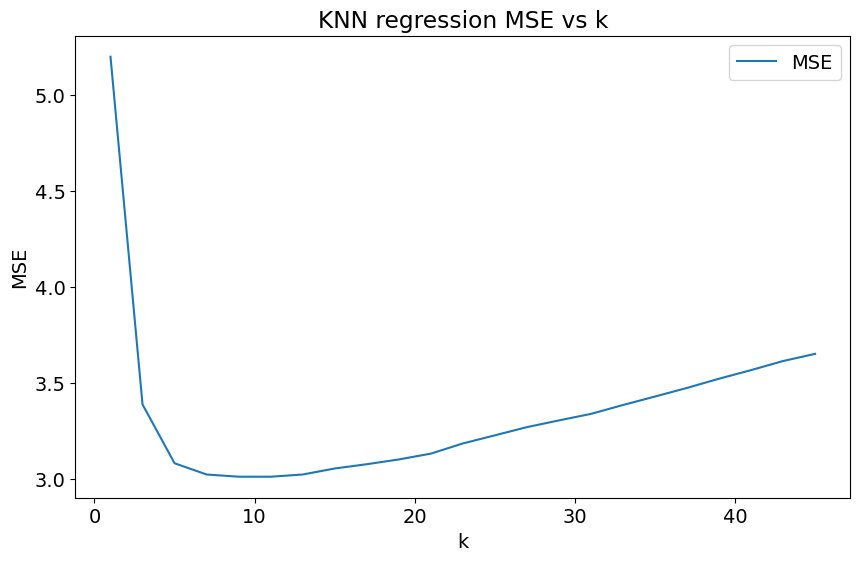

In [33]:
# Plot the MSE for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, [store[k] for k in k_values], label="MSE")
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("KNN regression MSE vs k")
plt.legend()
plt.show()

In [34]:
# Get the optimal k
optimal_k = min(store, key=store.get)
print("Optimal k: ", optimal_k)
print("Validation MSE: ", store[optimal_k])

Optimal k:  11
Validation MSE:  3.009886505660207


We have used a 5 fold cross validation in order to determine the optimal value k for the kNN regression model. We have found that the optimal value of k is 11. Indeed, this value gives us the best performance for our kNN regression model. We will use this value of k in the next section.

1.4.2

We want to compare our kNN model with the ones previously built. We first compute the in-sample and out-of-sample mean squared error and $R^2$ score for the kNN model. We then compare our results with the ones obtained for the linear regression, lasso regression and elastic net models.

In [35]:
# Train the model with the optimal k and test it on the test set
y_pred = k_neighbours(X_train_std, X_test_std, optimal_k)
y_pred = np.mean(y_train[y_pred], axis=1)

# Evaluate the model on the test set
print("Test MSE: ", np.mean((y_test - y_pred) ** 2))
print("Test R2 score: ", 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

Test MSE:  2.9626671968227853
Test R2 score:  0.8631188698801486


In [36]:
# Create table with the results for train and test for better visualisation and comparison
results_knn = pd.DataFrame({'MSE': [None, np.mean((y_test - y_pred) ** 2)],
                        'R2 score': [None,
                                        1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)]},
                        index=['Train', 'Test'])
print("Results for train and test for the kNN model:")
results_knn


Results for train and test for the kNN model:


,MSE,R2 score
Train,NaN,NaN
Test,2.962667,0.863119


In [37]:
# Recreate dataframe for plotting 
results_en = pd.DataFrame({'MSE': [None, results_elastic['alpha = 0.1'][0]],
                        'R2 score': [None,
                                        results_elastic['alpha = 0.1'][1]]},
                        index=['Train', 'Test'])

In [38]:
# Dataframe with MSE 
results_mse = pd.DataFrame({
                        'Linear Regression': [results_linear['MSE'][1], results_linear['R2 score'][1]],
                        'Lasso Regression': [results_lasso['MSE'][1], results_lasso['R2 score'][1]],
                        'Elastic net': [results_en['MSE'][1], results_en['R2 score'][1]],
                        'kNN': [results_knn['MSE'][1], results_knn['R2 score'][1]]},
                        index=['MSE', 'R2 score'])

results_mse = results_mse.T
# Sort values by MSE
results_mse.sort_values(by=['MSE'], inplace=True)
results_mse

,MSE,R2 score
Lasso Regression,1.984229,0.908325
Elastic net,1.984366,0.908318
Linear Regression,1.984390,0.908317
kNN,2.962667,0.863119


We have built and summarized the results of the different models in a table. Thanks to that table, we can compare the perfomance of the different models that we have previously built. 

We notice immediately that the Lasso Regression, the Linear Regression and the Elastic net seem to perform very similarly. Indeed, the difference between the MSE and $R^2$ score is very small. This could have been expected as they use a similar approach to minimize the MSE compared to the kNN regression model.

We can conclude from this analysis that linear regression models seem to fit the data much better than local models such as kNN. This suggests that the relationship between predictor and outcome is much more likely to be linear. It is possible that the choice of the prediction function is what is not so effective for this kNN model. Predicting the output as the average of points within the neighbourhood is probably not the best approach for our task.

Moreover, we also see that the Lasso Regression seems to perform best. Indeed, it has the lowest MSE and the highest $R^2$ score. This means that the Lasso Regression model could be the most performant model. This is also due to the fact that we have tuned the hyperparameters of the Elastic net model using grid search and therefore have only inspected a few values of the hyperparameters. This means that we could have potentially found a better value of the hyperparameters for the Elastic net model as this one is more complex than the Lasso Regression model. In fact, the Elastic net model should be able to perform equally or better than the Lasso Regression model as it has a similar structure and more degrees of freedom.

## Task 2: Classification  (50 marks)



#### 2.1 Random forest (20 marks)
2.1.1

In this second task, we aim to train a classification model to classify the diabetes diagnosis based on patient data.

The first classifier that we consider is Random Forest. Thus, we first train a Random Forest Classifier on the training dataset employing cross-entropy and then perform a grid search with 4-fold cross-validation in order to optimise and tune the hyperparameters. 

We will use the cross entropy function which is defined as: $$\sum_{q=1}^{Q}\pi_{q}(R_{\alpha})log\pi_{q}(R_{\alpha})$$ , i.e. the cross-entropy of $\pi(R_{\alpha})$.

Please note that we do not standardize our datasets as the algorithm is not sensitive to differences in scale or centering of the input features.

In [39]:
# Load the data
diabetes_df = pd.read_csv("diabetes_samples.csv", sep=",", decimal=".")
diabetes_df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,115,224,85,30,"7,5",36,69,205,"30,3",150,99,37,41,"0,9",No diabetes
1,318,194,95,36,"5,4",63,58,210,"43,9",140,100,44,53,"0,83",No diabetes
2,73,207,75,44,"4,7",30,72,180,"24,4",118,62,35,41,"0,85",No diabetes
3,69,144,81,28,"5,1",30,72,165,"22,4",118,78,31,38,"0,82",No diabetes
4,326,181,177,24,"7,5",64,71,225,"31,4",130,66,44,47,"0,94",Diabetes


In [40]:
X_train = diabetes_df.drop("diabetes", axis=1)
# Transform columns with , to .
X_train = X_train.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
# Convert to float
X_train = X_train.astype(float)
print("X_train shape: ", X_train.shape)

y_train = diabetes_df["diabetes"]
# Convert to 0 and 1 
y_train = y_train.apply(lambda x: 0 if x == "No diabetes" else 1)
print("y_train shape: ", y_train.shape)

X_train shape:  (273, 14)
y_train shape:  (273,)


In [41]:
# Load the data
diabetes_test_df = pd.read_csv("diabetes_test.csv", sep=",", decimal=".")
diabetes_test_df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,3,217,75,54,4,20,67,187,"29,3",110,72,40,45,"0,89",No diabetes
1,5,164,91,67,"2,4",20,70,141,"20,2",122,86,32,39,"0,82",No diabetes
2,6,170,69,64,"2,7",20,64,161,"27,6",108,70,37,40,"0,93",No diabetes
3,8,164,71,63,"2,6",20,72,145,"19,7",108,78,29,36,"0,81",No diabetes
4,9,230,112,64,"3,6",20,67,159,"24,9",100,90,31,39,"0,79",No diabetes


In [42]:
X_test = diabetes_test_df.drop("diabetes", axis=1)
# Transform columns with , to .
X_test = X_test.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
# Convert to float
X_test = X_test.astype(float)
print("X_test shape: ", X_test.shape)

y_test = diabetes_test_df["diabetes"]
# Convert to 0 and 1 
y_test = y_test.apply(lambda x: 0 if x == "No diabetes" else 1)
print("y_test shape: ", y_test.shape)

X_test shape:  (117, 14)
y_test shape:  (117,)


In [43]:
# Necessary functions t train a Random forest classifier using cross entropy information
def cross_entropy_index(y, sample_weights):
    """ 
    Calculate the cross entropy index for labels.
    Arguments:
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (float): the cross entropy index for y.
    """

    # compute the cross entropy index
    label_weights = {yi: 0 for yi in set(y)}  
    for yi, wi in zip(y, sample_weights):
      label_weights[yi] += wi

    total_weight = sum(label_weights.values())
    ce = 0 
    for label, weight in label_weights.items():
      ce -= (weight / total_weight)* np.log(weight / total_weight)

    return ce

def split_samples(X, y, sample_weights, column, value, categorical):
  """
  Return the split of data whose column-th feature:
    1. equals value, in case `column` is categorical, or
    2. less than value, in case `column` is not categorical (i.e. numerical)

  Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for splitting.
      value: splitting threshold  the samples 
      categorical: boolean value indicating whether column is a categorical variable or numerical.
  Returns:
      tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of sample weights based on column-th value.
  """ 

  if categorical:
    left_mask =(X[:, column] == value)
  else:
    left_mask = (X[:, column] < value)

  X_left, X_right = X[left_mask, :], X[~left_mask, :]
  y_left, y_right = y[left_mask], y[~left_mask]
  w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]

  return (X_left, X_right), (y_left, y_right), (w_left, w_right)

def cross_entropy_value(X, y, sample_weights, column, categorical):
    """
    Calculate the cross entropy index based on `column` with the split that minimizes the cross entropy index.
    Arguments:
        X: training features, of shape (N, D).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        column: the column of the feature for calculating. 0 <= column < D
        categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
        (float, float): the resulted cross entropy index and the corresponding value used in splitting.
    """

    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    ce_index_val, threshold = np.inf, None
  
  # split the values of i-th feature and calculate the cost 
    for value in unique_vals:
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical)

    # if one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue

        p_left = sum(w_l)/(sum(w_l) + sum(w_r))
        p_right = 1 - p_left
        new_cost = p_left * cross_entropy_index(y_l, w_l) + p_right * cross_entropy_index(y_r, w_r)
        if new_cost < ce_index_val:
            ce_index_val, threshold = new_cost, value
    
    return ce_index_val, threshold

def cross_entropy_rf(n_features, X, y, sample_weights, columns_dict):
    """
    Choose the best feature to split according to cross entropy criterion.
    Args:
        n_features: number of sampled features.
        X: training features, of shape (N, D).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
        (float, int, float): the minimized cross entropy index, the best feature index and value used in splitting.
    """
    # sample n_features from the columns_dict
    columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False)
    columns_dict = {c: columns_dict[c] for c in columns}

    min_ce_index, split_column, split_val = np.inf, 0, 0
    for column, categorical in columns_dict.items():
        if len(np.unique(X[:, column])) < 2:
            continue

        # search for the best splitting value for the given column.
        ce_index, val = cross_entropy_value(X, y, sample_weights, column, categorical)
        if ce_index < min_ce_index:
            min_ce_index, split_column, split_val = ce_index, column, val

    return min_ce_index, split_column, split_val

def majority_vote(y, sample_weights):
  """
  Return the label which appears the most in y.
  Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (int): the majority label
  """
  majority_label = {yi: 0 for yi in set(y)}

  for yi, wi in zip(y, sample_weights):
      majority_label[yi] += wi
  return max(majority_label, key=majority_label.get)

def build_tree_rf(n_features, X, y, sample_weights, columns_dict, feature_names, depth,  max_depth=10, min_samples_leaf=2):
  """Build the decision tree according to the data.
  Args:
      X: (np.array) training features, of shape (N, D).
      y: (np.array) vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      feature_names (list): record the name of features in X in the original dataset.
      depth (int): current depth for this node.
  Returns:
      (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
        1. 'feature_name': The column name of the split.
        2. 'feature_index': The column index of the split.
        3. 'value': The value used for the split.
        4. 'categorical': indicator for categorical/numerical variables.
        5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
        6. 'left': The left sub-tree with the same structure.
        7. 'right' The right sub-tree with the same structure.
      Example:
          mytree = {
              'feature_name': 'petal length (cm)',
              'feature_index': 2,
              'value': 3.0,
              'categorical': False,
              'majority_label': None,
              'left': {
                  'feature_name': str,
                  'feature_index': int,
                  'value': float,
                  'categorical': bool,
                  'majority_label': None,
                  'left': {..etc.},
                  'right': {..etc.}
              }
              'right': {
                  'feature_name': str,
                  'feature_index': int,
                  'value': float,
                  'categorical': bool,
                  'majority_label': None,
                  'left': {..etc.},
                  'right': {..etc.}
              }
          }
  """

  # include a clause for the cases where (i) all lables are the same, (ii) depth exceed (iii) X is too small
  if len(np.unique(y)) == 1 or depth>=max_depth or len(X)<=min_samples_leaf: 
    return {'majority_label': majority_vote(y, sample_weights)}
  
  else:
      ce, split_index, split_val = cross_entropy_rf(n_features, X, y, sample_weights, columns_dict)
  
  if ce == np.inf:
      return {'majority_label': majority_vote(y, sample_weights)}
  categorical = columns_dict[split_index]
  (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, split_index, split_val, categorical)
  return {
      'feature_name': feature_names[split_index],
      'feature_index': split_index,
      'value': split_val,
      'categorical': categorical,
      'majority_label': None,
      'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
      'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
  }

def train_rf(B, n_features, X, y,  columns_dict, sample_weights=None, bootstrap_weights=None, max_depth=100):
  """
  Build the decision tree according to the training data.
  Args:
      B: number of decision trees.
      X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
      y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] <= C. Here C = 1.
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      sample_weights: weights for each samples, of shape (N,).
  """
  if sample_weights is None:
    # if the sample weights is not provided, we assume the samples have uniform weights
    sample_weights = np.ones(X.shape[0]) / X.shape[0]
  else:
    sample_weights = np.array(sample_weights) / np.sum(sample_weights)
  #normalise the bootstrap weights
  if bootstrap_weights is None:
    # if the sample weights is not provided, we assume the samples have uniform weights
    bootstrap_weights = np.ones(X.shape[0]) / X.shape[0]
  else:
    bootstrap_weights = np.array(bootstrap_weights) / np.sum(bootstrap_weights)

  feature_names = X.columns.tolist()
  X = X.to_numpy()
  y = y.to_numpy()
  N = X.shape[0]
  training_indices = np.arange(N)
  trees = []
  for _ in range(B):
    sample = np.random.choice(training_indices, N, p=bootstrap_weights, replace=True) 
    X_sample = X[sample, :]
    y_sample = y[sample]
    w_sample = sample_weights[sample]
    tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, feature_names, depth=1, max_depth=max_depth)
    trees.append(tree)

  return trees

def classify(tree, x):
  """
  Classify a single sample with the fitted decision tree.
  Args:
      x: ((pd.Dataframe) a single sample features, of shape (D,).
  Returns:
      (int): predicted testing sample label.
  """
  if tree['majority_label'] is not None: 
    return tree['majority_label']

  elif tree['categorical']:
    if x[tree['feature_index']] == tree['value']:
      return classify(tree['left'], x)
    else:
      return classify(tree['right'], x)

  else:
    if x[tree['feature_index']] < tree['value']:
      return classify(tree['left'], x)
    else:
      return classify(tree['right'], x)

def predict_rf(rf, X, proba=False):
  """
  Predict classification results for X.
  Args:
      rf: A trained random forest through train_rf function.
      X: (pd.Dataframe) testing sample features, of shape (N, D).
  Returns:
      (np.array): predicted testing sample labels, of shape (N,).
  """

  def aggregate(decisions):
    count = defaultdict(int)
    for decision in decisions:
      count[decision] += 1
    return max(count, key=count.get)
  
  def aggregate_proba(decisions):
        count = defaultdict(int)
        for decision in decisions:
            count[decision] += 1
        return count[1]/len(decisions)
  if proba:
    X = X[:].values
    if len(X.shape) == 1:
      return aggregate_proba([classify(tree, X) for tree in rf])
    else:
      return np.array([aggregate_proba([classify(tree, x) for tree in rf]) for x in X])
  else:
    X = X[:].values
    if len(X.shape) == 1:
      return aggregate([classify(tree, X) for tree in rf])
    else:
      return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

def rf_score(rf, X_test, y_test):
  y_pred = predict_rf(rf, X_test)
  return np.mean(y_pred==y_test)

In [44]:
# Train the random forest
n_features = int(np.sqrt(X_train.shape[1]))
columns_dict = {i: False for i in range(X_train.shape[1])}
B = 20
# Fit the random forest with training data
rf = train_rf(B, n_features, X_train, y_train, columns_dict)

In [45]:
def cross_val_split(N, num_folds):
  fold_size = N // num_folds
  index_perm = np.random.permutation(np.arange(N))
  folds = []
  for k in range(num_folds):
    folds.append(index_perm[k*fold_size:(k+1)*fold_size])
  return folds

In [46]:
# 4 fold cross validation

# Shuffle the dataset
p = np.random.permutation(len(y_train))
X_train_shuffled = X_train.iloc[p, :]
y_train_shuffled = y_train[p]

# Five fold cross-validation
folds_indexes = cross_val_split(len(y_train), 4)

depth_values = [4, 6, 8, 10, 12]
trees_values = [10, 30, 50, 70, 90, 100]

grid_search = {}
for depth in depth_values:
  for trees in trees_values:
    scores = []
    for fold in folds_indexes:
      # Split the data into training and validation
      X_train_fold = X_train_shuffled.iloc[fold, :]
      y_train_fold = y_train_shuffled[fold]
      X_val_fold = X_train_shuffled.drop(fold, axis=0) 
      y_val_fold = y_train_shuffled.drop(fold, axis=0)

      # Train the random forest
      rf = train_rf(trees, n_features, X_train_fold, y_train_fold, columns_dict, max_depth=depth)

      # Evaluate the random forest
      scores.append(rf_score(rf, X_val_fold, y_val_fold))
    grid_search[(depth, trees)] = np.mean(scores)
    print("Depth: ", depth, "Trees: ", trees, "Score: ", np.mean(scores))

Depth:  4 Trees:  10 Score:  0.8182926829268292
Depth:  4 Trees:  30 Score:  0.8170731707317073
Depth:  4 Trees:  50 Score:  0.824390243902439
Depth:  4 Trees:  70 Score:  0.8268292682926829
Depth:  4 Trees:  90 Score:  0.8182926829268292
Depth:  4 Trees:  100 Score:  0.824390243902439
Depth:  6 Trees:  10 Score:  0.8060975609756098
Depth:  6 Trees:  30 Score:  0.8134146341463415
Depth:  6 Trees:  50 Score:  0.8085365853658537
Depth:  6 Trees:  70 Score:  0.8036585365853659
Depth:  6 Trees:  90 Score:  0.8036585365853659
Depth:  6 Trees:  100 Score:  0.8097560975609757
Depth:  8 Trees:  10 Score:  0.7865853658536586
Depth:  8 Trees:  30 Score:  0.7914634146341464
Depth:  8 Trees:  50 Score:  0.7987804878048781
Depth:  8 Trees:  70 Score:  0.8
Depth:  8 Trees:  90 Score:  0.7987804878048781
Depth:  8 Trees:  100 Score:  0.7987804878048781
Depth:  10 Trees:  10 Score:  0.7914634146341464
Depth:  10 Trees:  30 Score:  0.7951219512195122
Depth:  10 Trees:  50 Score:  0.7975609756097561
Dep

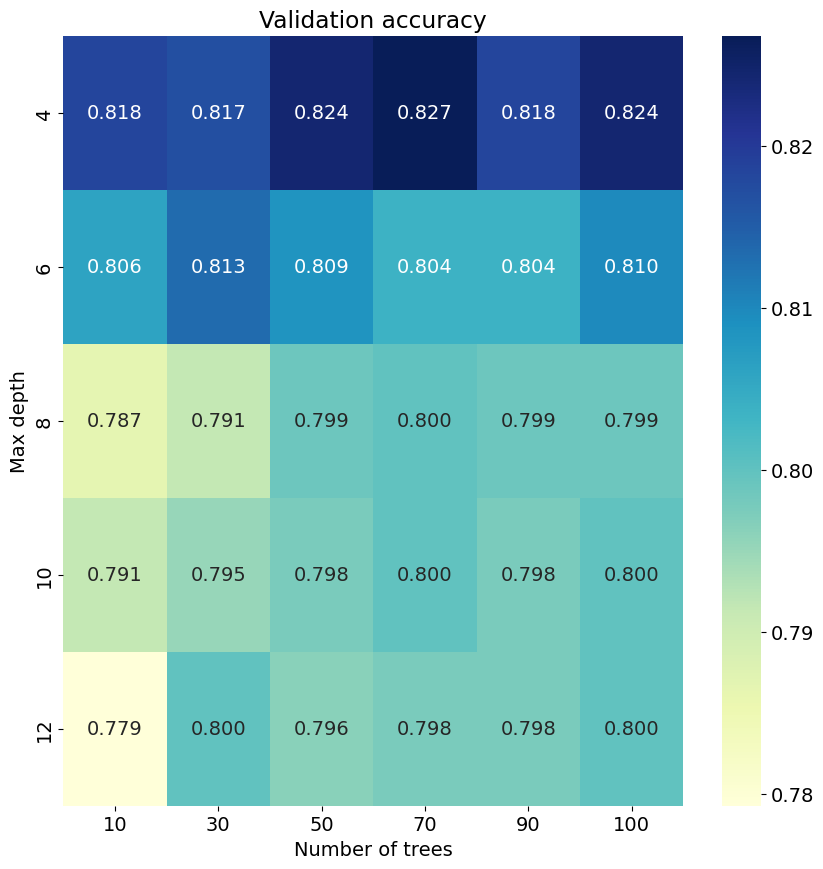

In [47]:
# Plot grid search results
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(np.array(list(grid_search.values())).reshape(5, 6), annot=True, ax=ax, cmap="YlGnBu", fmt=".3f", xticklabels=trees_values, yticklabels=depth_values)
ax.set_xlabel("Number of trees")
ax.set_ylabel("Max depth")
ax.set_title("Validation accuracy")
plt.show()

After performing a grid search with 4-fold cross-validation, we have found that the optimal hyperparameters are: depth=4 and trees=70. We have used the accuracy as the measure of performance for this optimisation.

2.1.2

We now want to use these optimal hyperparameters to compare the peformance of our model on the train dataset and on the test dataset. We also compute different measures such as the accuracy, precision and F-score.

In [48]:
def precision_score(y_true, y_pred):
    """
    Compute the precision score.
    Args:
        y_true: (np.array) true labels, of shape (N,).
        y_pred: (np.array) predicted labels, of shape (N,).
    Returns:
        (float): precision score.
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    # Avoid division by zero
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def recall_score(y_true, y_pred):
    """
    Compute the recall score.
    Args:
        y_true: (np.array) true labels, of shape (N,).
        y_pred: (np.array) predicted labels, of shape (N,).
    Returns:
        (float): recall score.
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

def f1_score(y_true, y_pred):
    """
    Compute the F1 score.
    Args:
        y_true: (np.array) true labels, of shape (N,).
        y_pred: (np.array) predicted labels, of shape (N,).
    Returns:
        (float): F1 score.
    """
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    # Avoid division by zero
    if precision + recall == 0:
        return 0
    return 2 * precision * recall / (precision + recall)

In [49]:
# Train the random forest with the best parameters
optimal_depth = max(grid_search, key=grid_search.get)[0]
optimal_trees = max(grid_search, key=grid_search.get)[1]
print("Optimal depth: ", optimal_depth)
print("Optimal trees: ", optimal_trees)
rf = train_rf(optimal_trees, n_features, X_train, y_train, columns_dict, max_depth=optimal_depth)

# Evaluate the random forest on the train set (accuracy, precision, recall, f1)
print("==== TRAIN SET ====")
print("Train accuracy: ", rf_score(rf, X_train, y_train))
print("Train precision: ", precision_score(y_train, predict_rf(rf, X_train)))
print("Train recall: ", recall_score(y_train, predict_rf(rf, X_train)))
print("Train f1: ", f1_score(y_train, predict_rf(rf, X_train)))
print("How many predictions are positives: ", np.sum(predict_rf(rf, X_train)))
print("True positives: ", np.sum((y_train == 1) & (predict_rf(rf, X_train) == 1)))
print("False positives: ", np.sum((y_train == 0) & (predict_rf(rf, X_train) == 1)))
print("True negatives: ", np.sum((y_train == 0) & (predict_rf(rf, X_train) == 0)))
print("False negatives: ", np.sum((y_train == 1) & (predict_rf(rf, X_train) == 0)))

print("\n============================================\n")


# Evaluate the random forest on the test set (accuracy, precision, recall, f1)
print("==== TEST SET ====")
print("Test accuracy: ", rf_score(rf, X_test, y_test))
print("Test precision: ", precision_score(y_test, predict_rf(rf, X_test)))
print("Test recall: ", recall_score(y_test, predict_rf(rf, X_test)))
print("Test f1: ", f1_score(y_test, predict_rf(rf, X_test)))
print("How many predictions are positives: ", np.sum(predict_rf(rf, X_test)))
print("True positives: ", np.sum((y_test == 1) & (predict_rf(rf, X_test) == 1)))
print("False positives: ", np.sum((y_test == 0) & (predict_rf(rf, X_test) == 1)))
print("True negatives: ", np.sum((y_test == 0) & (predict_rf(rf, X_test) == 0)))
print("False negatives: ", np.sum((y_test == 1) & (predict_rf(rf, X_test) == 0)))

Optimal depth:  4
Optimal trees:  70
==== TRAIN SET ====
Train accuracy:  0.9047619047619048
Train precision:  0.95
Train recall:  0.4318181818181818
Train f1:  0.59375
How many predictions are positives:  20
True positives:  19
False positives:  1
True negatives:  228
False negatives:  25


==== TEST SET ====
Test accuracy:  0.905982905982906
Test precision:  0.7777777777777778
Test recall:  0.4375
Test f1:  0.56
How many predictions are positives:  9
True positives:  7
False positives:  2
True negatives:  99
False negatives:  9


It seems that our Random Forest model performs very well: high accuracy and precision on both the test and train sets. However, we can notice that our recall measure is not as high and could potentially be improved further.

Moreover, we notice that the precision and the F1 score is lower on the test set than on the train set. This could mean that our model is overfitting the training data. For example, it could be due to the fact that we have not used any regularization technique such as pruning or bagging.

2.1.3

We now want to investigate if our dataset is balanced or unbalanced in order to introduce the appropriate weights to balance the outcomes if it is unbalanced. Moreover, we would like to plot the ROC curve as well as the Precision-Recall curve to compare the performance of the different settings.

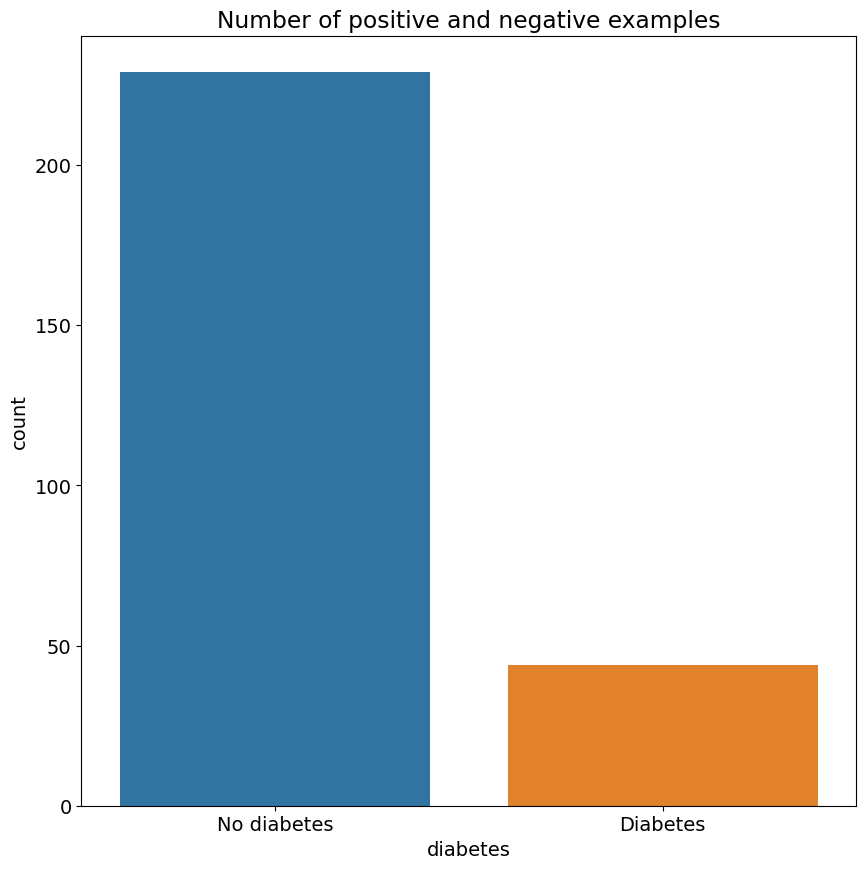

Frequency of diabetes:  0.16117216117216118
Frequency of no diabetes:  0.8388278388278388


No diabetes    229
Diabetes        44
Name: diabetes, dtype: int64

In [50]:
# Demonstrate the dataset is unbalanced by plotting the number of positive and negative examples
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x="diabetes", data=diabetes_df, ax=ax)
ax.set_title("Number of positive and negative examples")
plt.show()

# Compute the frequencies of diagnosis outcomes
freq_diabetes = diabetes_df["diabetes"].value_counts()[1]/ len(diabetes_df)
print("Frequency of diabetes: ", freq_diabetes)
print("Frequency of no diabetes: ", 1 - freq_diabetes)
diabetes_df["diabetes"].value_counts()


This is indeed highly unbalanced (229/44). We will try to rebalance the dataset during the training phase by introducing some weights at the bootstrap step. We set the weight at a certain index to be inversely proportional to the number of diagnoses of its label. We normalize these weights so that they sum to 1.

In [51]:
# Introduce weights for each data point that balance the diagnosis outcomes
weights = np.ones(len(y_train))
weights[y_train == 1] = 1/(2*44)
weights[y_train == 0] = 1/(2*229)

In [52]:
# 4 fold cross validation

# Shuffle the dataset
p = np.random.permutation(len(y_train))
X_train_shuffled = X_train.iloc[p, :]
y_train_shuffled = y_train[p]

# Five fold cross-validation
folds_indexes = cross_val_split(len(y_train), 4)

depth_values = [4, 6, 8, 10, 12]
trees_values = [10, 30, 50, 70, 90, 100]

grid_search = {}
for depth in depth_values:
  for trees in trees_values:
    scores = []
    for fold in folds_indexes:
      # Split the data into training and validation
      X_train_fold = X_train_shuffled.iloc[fold, :]
      y_train_fold = y_train_shuffled[fold]
      X_val_fold = X_train_shuffled.drop(fold, axis=0) 
      y_val_fold = y_train_shuffled.drop(fold, axis=0)
      weights_fold = weights[fold]

      # Train the random forest
      rf = train_rf(trees, n_features, X_train_fold, y_train_fold, columns_dict, max_depth=depth, bootstrap_weights=weights_fold)

      # Evaluate the random forest
      scores.append(rf_score(rf, X_val_fold, y_val_fold))
    grid_search[(depth, trees)] = np.mean(scores)
    print("Depth: ", depth, "Trees: ", trees, "Score: ", np.mean(scores))

Depth:  4 Trees:  10 Score:  0.6756097560975609
Depth:  4 Trees:  30 Score:  0.6402439024390244
Depth:  4 Trees:  50 Score:  0.6853658536585365
Depth:  4 Trees:  70 Score:  0.6743902439024391
Depth:  4 Trees:  90 Score:  0.6939024390243902
Depth:  4 Trees:  100 Score:  0.6804878048780487
Depth:  6 Trees:  10 Score:  0.673170731707317
Depth:  6 Trees:  30 Score:  0.7219512195121951
Depth:  6 Trees:  50 Score:  0.7341463414634146
Depth:  6 Trees:  70 Score:  0.7292682926829268
Depth:  6 Trees:  90 Score:  0.7268292682926829
Depth:  6 Trees:  100 Score:  0.7280487804878049
Depth:  8 Trees:  10 Score:  0.7134146341463414
Depth:  8 Trees:  30 Score:  0.7414634146341463
Depth:  8 Trees:  50 Score:  0.75
Depth:  8 Trees:  70 Score:  0.751219512195122
Depth:  8 Trees:  90 Score:  0.7609756097560976
Depth:  8 Trees:  100 Score:  0.7621951219512195
Depth:  10 Trees:  10 Score:  0.7426829268292683
Depth:  10 Trees:  30 Score:  0.748780487804878
Depth:  10 Trees:  50 Score:  0.7719512195121951
Dep

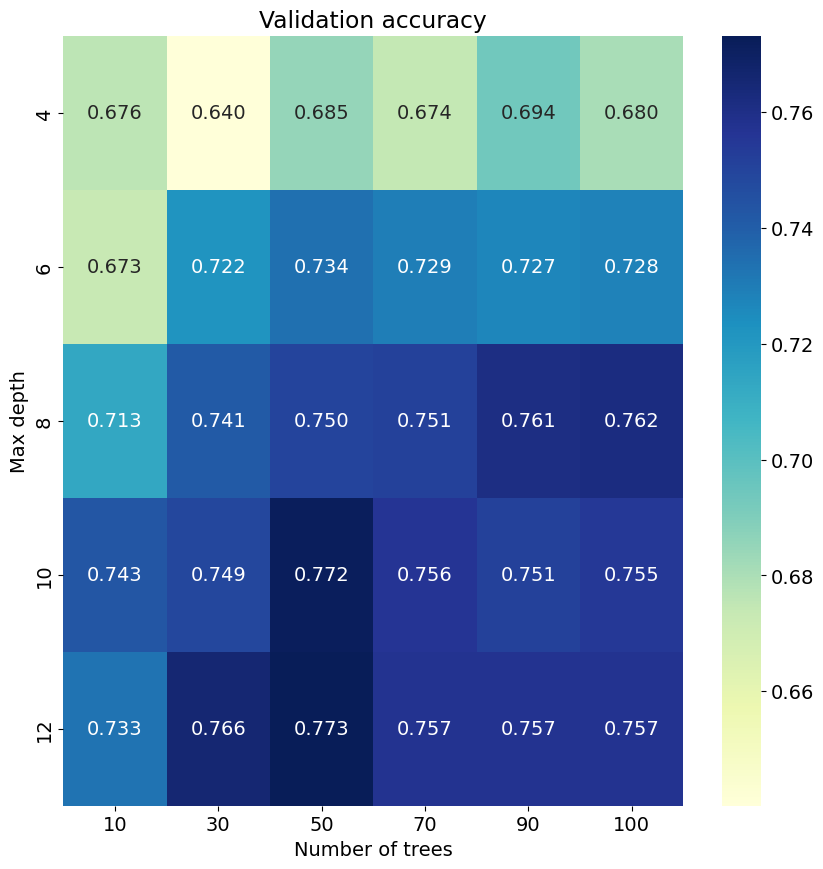

In [53]:
# Plot grid search results
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(np.array(list(grid_search.values())).reshape(5, 6), annot=True, ax=ax, cmap="YlGnBu", fmt=".3f", xticklabels=trees_values, yticklabels=depth_values)
ax.set_xlabel("Number of trees")
ax.set_ylabel("Max depth")
ax.set_title("Validation accuracy")
plt.show()

In [54]:
# Train the random forest with the best parameters and the balanced weights
optimal_depth = max(grid_search, key=grid_search.get)[0]
optimal_trees = max(grid_search, key=grid_search.get)[1]
rf = train_rf(optimal_trees, n_features, X_train, y_train, columns_dict, max_depth=optimal_depth, bootstrap_weights=weights)

# Evaluate the random forest on the train set (accuracy, precision, recall, f1)
print("==== TRAIN SET ====")
print("Train accuracy: ", rf_score(rf, X_train, y_train))
print("Train precision: ", precision_score(y_train, predict_rf(rf, X_train)))
print("Train recall: ", recall_score(y_train, predict_rf(rf, X_train)))
print("Train f1: ", f1_score(y_train, predict_rf(rf, X_train)))
print("How many predictions are positives: ", np.sum(predict_rf(rf, X_train)))
print("True positives: ", np.sum((y_train == 1) & (predict_rf(rf, X_train) == 1)))
print("False positives: ", np.sum((y_train == 0) & (predict_rf(rf, X_train) == 1)))
print("True negatives: ", np.sum((y_train == 0) & (predict_rf(rf, X_train) == 0)))
print("False negatives: ", np.sum((y_train == 1) & (predict_rf(rf, X_train) == 0)))

print("\n============================================\n")

# Evaluate the random forest on the test set (accuracy, precision, recall, f1)
print("==== TEST SET ====")
print("Test accuracy: ", rf_score(rf, X_test, y_test))
print("Test precision: ", precision_score(y_test, predict_rf(rf, X_test)))
print("Test recall: ", recall_score(y_test, predict_rf(rf, X_test)))
print("Test f1: ", f1_score(y_test, predict_rf(rf, X_test)))
print("How many predictions are positives: ", np.sum(predict_rf(rf, X_test)))
print("True positives: ", np.sum((y_test == 1) & (predict_rf(rf, X_test) == 1)))
print("False positives: ", np.sum((y_test == 0) & (predict_rf(rf, X_test) == 1)))
print("True negatives: ", np.sum((y_test == 0) & (predict_rf(rf, X_test) == 0)))
print("False negatives: ", np.sum((y_test == 1) & (predict_rf(rf, X_test) == 0)))

==== TRAIN SET ====
Train accuracy:  1.0
Train precision:  1.0
Train recall:  1.0
Train f1:  1.0
How many predictions are positives:  44
True positives:  44
False positives:  0
True negatives:  229
False negatives:  0


==== TEST SET ====
Test accuracy:  0.9145299145299145
Test precision:  0.6666666666666666
Test recall:  0.75
Test f1:  0.7058823529411765
How many predictions are positives:  18
True positives:  12
False positives:  6
True negatives:  95
False negatives:  4


In [55]:
def roc_plot(y_true, y_prob):
    """
    Plot the ROC curve given the true labels and the predicted probabilities.

    Parameters:
    y_true : array-like, shape (n_samples,)
        True labels.
    y_prob : array-like, shape (n_samples,)
        Predicted probabilities.

    Returns:
    auc : float
        Area under the ROC curve.
    tpr_l : list
        List of true positive rates.
    fpr_l : list
        List of false positive rates.
    thresholds : list
        List of thresholds.
    """
    # Setting the thresholds
    thresholds = reversed(sorted(set(y_prob)))
    tpr_l, fpr_l = [], []
    y_true_m = np.array(y_true==1.).astype("int")
    for threshold in thresholds:
        y_threshold = (y_prob >= threshold)
        # Compute the true positive, false positive, true negative and false negative
        tp = np.sum(y_true_m & y_threshold)
        tn = np.sum((~y_true_m) & (~y_threshold))
        fp = np.sum((~y_true_m) & y_threshold)
        fn = np.sum(y_true_m & (~y_threshold))
        # Compute the true positive rate and false positive rate
        tpr = tp / (tp + fn) 
        fpr = fp / (tn + fp)
        tpr_l.append(tpr)
        fpr_l.append(fpr)

    # Compute AUC using np.trapz
    auc = np.trapz(tpr_l, fpr_l)
    return auc, tpr_l, fpr_l, thresholds

In [56]:
# Getting the necessary data for the ROC plot
trees_1 = train_rf(70, n_features, X_train, y_train, columns_dict,max_depth = 4)
y_prob_1 = predict_rf(trees_1,X_test,proba=True)
trees_2 = train_rf(50, n_features, X_train, y_train, columns_dict,max_depth = 12, bootstrap_weights=weights)
y_prob_2 = predict_rf(trees_2,X_test,proba=True)
auc1, tpr1, fpr1, thresholds1 = roc_plot(y_test, y_prob_1)
auc2, tpr2, fpr2, thresholds2 = roc_plot(y_test, y_prob_2)

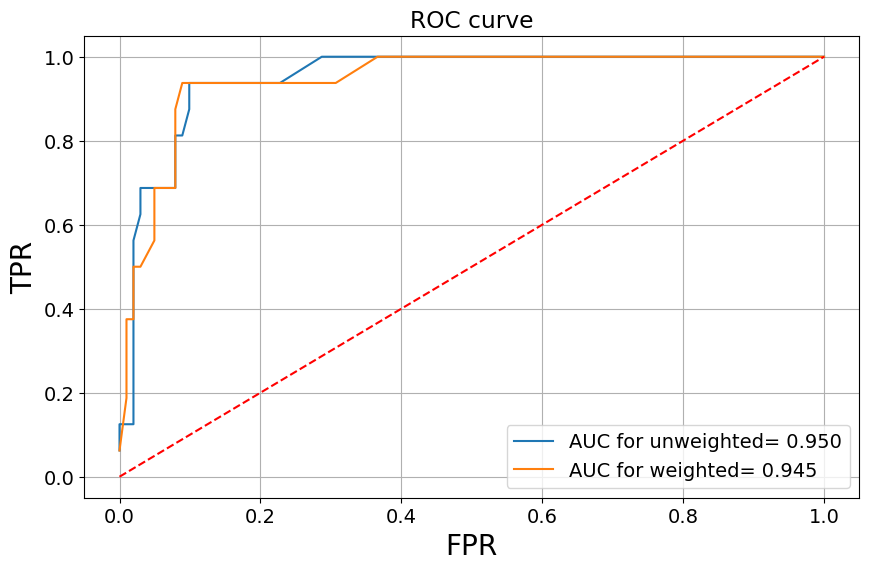

In [57]:
# Plotting the ROC curve
plt.plot(fpr1, tpr1, label = f'AUC for unweighted= {auc1:0.3f}')
plt.plot(fpr2, tpr2, label = f'AUC for weighted= {auc2:0.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.legend(loc = 'lower right')
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.grid()
plt.title('ROC curve')
plt.show()

In [58]:
def precision_recall_plot(y_true, y_prob):
    """
    Plot the precision-recall curve given the true labels and the predicted probabilities.

    Parameters:
    y_true : array-like, shape (n_samples,)
        True labels.
    y_prob : array-like, shape (n_samples,)
        Predicted probabilities.

    Returns:
    auc : float
        Area under the precision-recall curve.
    tpr_l : list
        List of true positive rates.
    fpr_l : list
        List of false positive rates.
    thresholds : list
        List of thresholds.
    precisions : list
        List of precisions.
    """
    # Setting the thresholds
    thresholds = reversed(sorted(set(y_prob)))
    tpr_l, fpr_l = [], []
    precisions = []
    y_true_m = np.array(y_true==1.).astype("int")
    for threshold in thresholds:
        y_threshold = (y_prob >= threshold)
        # Compute the true positive, false positive, true negative and false negative
        tp = np.sum(y_true_m & y_threshold)
        tn = np.sum((~y_true_m) & (~y_threshold))
        fp = np.sum((~y_true_m) & y_threshold)
        fn = np.sum(y_true_m & (~y_threshold))
        # Compute the true positive rate and false positive rate
        tpr = tp / (tp + fn) 
        fpr = fp / (tn + fp)
        tpr_l.append(tpr)
        fpr_l.append(fpr)
        precisions.append(tp/(tp+fp))

    # Compute AUC using np.trapz
    auc = np.trapz(tpr_l, fpr_l)
    return auc, tpr_l, fpr_l, thresholds, precisions

In [59]:
# Getting the necessary data for the Precision-Recall plot
trees1 = train_rf(70, n_features, X_train, y_train, columns_dict,max_depth = 4)
y_prob_1 = predict_rf(trees1,X_test,proba=True)
trees2 = train_rf(50, n_features, X_train, y_train, columns_dict,max_depth = 12, bootstrap_weights=weights)
y_prob_2 = predict_rf(trees2,X_test,proba=True)
auc1, tpr1, fpr1, thresholds1, precisions1 = precision_recall_plot(y_test, y_prob_1)
auc2, tpr2, fpr2, thresholds2, precisions2 = precision_recall_plot(y_test, y_prob_2)

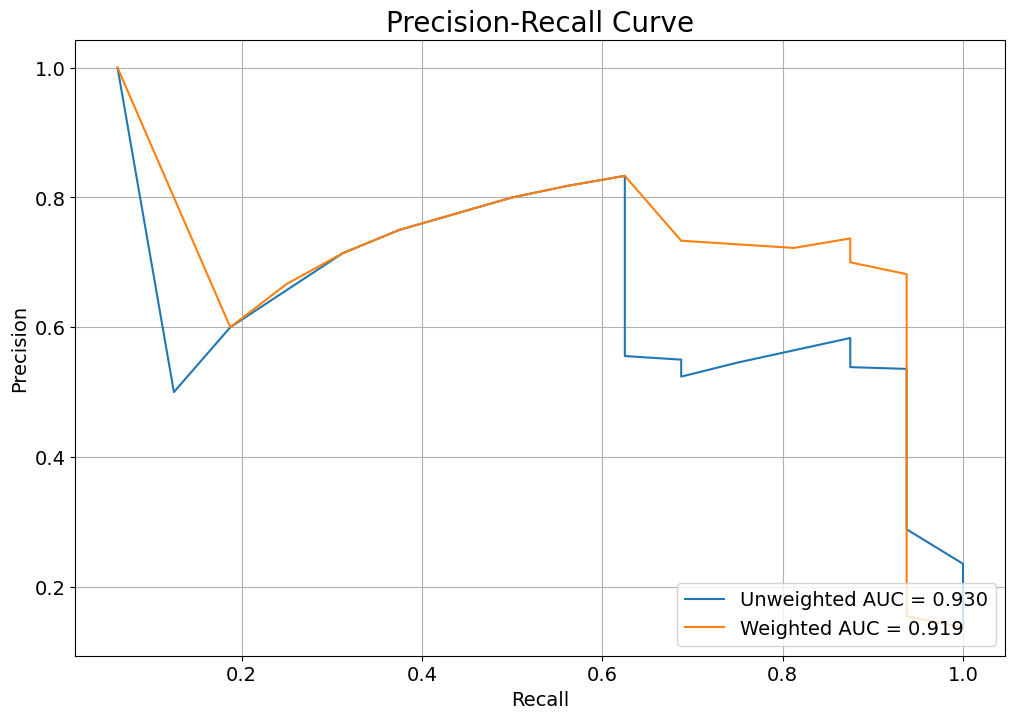

In [60]:
# Plotting the Precision-Recall curve
plt.figure(figsize=(12, 8))
plt.title(f"Precision-Recall Curve", size=20)
plt.plot(tpr1, precisions1, label=f"Unweighted AUC = {auc1:0.3f}")
plt.plot(tpr2, precisions2, label=f"Weighted AUC = {auc2:0.3f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.grid()
plt.show()

As we can see from the computed frequencies and the histogram of the proportion of diabetes and non-diabetes in our dataset, our dataset is unbalanced. Indeed, we have more non-diabetes than diabetes. This means that we should use the balanced weights in order to balance the outcomes. We therefore have performed the same steps than in the previous section but with the balanced weights in order to determine the optimal hyperparameters. We have found that the optimal hyperparameters are: depth=12 and trees=50. We have used the accuracy as the measure of performance for this optimisation.

Concerning the measures of performance of the weighted case, we notice that our new Random Forest model performs very well. Moreover, it seems to perform better than our previously built model. This is due to the fact that we have balanced the outcomes of the dataset. Indeed, the balanced weights have helped us to reduce the bias of the model towards the majority class. This means that the model is now able to predict the minority class with a higher accuracy.

On the other hand, the ROC curve of the unweighted case is slightly better than the ROC curve of the weighted case. The AUC is slightly better than the one for the weighted case. However, we could argue that both models perform well as both curves are above the y=x line and very close to each other.

Finally, for both instances, we observe a negative correlation between recall and precision, signifying that maximizing both simultaneously is challenging due to the tradeoff between the two. Upon comparing the performance of the weighted and unweighted bootstrap curves, we can see that the former surpasses the latter in terms of precision when the recall rate is high (over 0.6). Thus, if our primary objective is to ensure a high recall rate and guarantee a reasonable precision rate, we should choose the weighted model. This model concentrates more on training the classifier to identify positive outcomes that are rebalanced to minimize the unbalanced dataset.

#### 2.2	Support Vector Machine (SVM) (30 marks)
2.2.1

In this second part, we consider building a Support Vector Machine classifier to solve our task. We first train a soft-margin linear SVM classifier. We then perform a grid search with 4-fold cross-validation in order to optimise and tune the hardness $\lambda$ hyperparameter. We also display the average accuracy as $\lambda$ is varied.

In [61]:
# Standardise the data
def standardise(X):
    """
    Standardise the dataset X

    Parameters:
        X : numpy.ndarray 
            The dataset to standardise
    
    Returns:
        X_std : numpy.ndarray
            The standardised dataset
    """
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_std = (X - mu) / sigma
    return X_std
# Combine both datasets and standardise them
X =  np.vstack([X_train, X_test])
X_std = standardise(X)

# Split again the standardised dataset into train and test
X_train_std = X_std[:X_train.shape[0], :]
X_test_std = X_std[X_train.shape[0]:, :]

In [62]:
# Add intercept 
X_train_intercept = np.hstack((X_train_std, np.ones((len(X_train_std),1)) ))
X_test_intercept = np.hstack((X_test_std, np.ones((len(X_test_std),1)) )) 

In [63]:
# convert categorical labels to numbers
diag_map = {1.0: 1.0, 0.0: -1.0}
y_train_num = np.array([diag_map[i] for i in y_train])
y_test_num = np.array([diag_map[i] for i in y_test])

In [64]:
### SVM ###
def compute_cost(w, X, y, regul_strength=1e5):
  n = X.shape[0]
  distances = 1 - y * (X @ w)
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge = regul_strength * distances.mean()

  # calculate cost
  return 0.5 * np.dot(w, w) + hinge

# calculate gradient of cost
def calculate_cost_gradient(w, X_batch, y_batch, regul_strength=1e6):
  # if only one example is passed
  if type(y_batch) == np.float64:
      y_batch = np.asarray([y_batch])
      X_batch = np.asarray([X_batch])  # gives multidimensional array

  distance = 1 - (y_batch * (X_batch @ w))
  dw = np.zeros(len(w))

  for ind, d in enumerate(distance):
      if max(0, d)==0:
          di = w # derivative of first term
      else:
          di = w - (regul_strength * y_batch[ind] * X_batch[ind])
      dw += di

  return dw/len(y_batch)  # average

def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e6, print_outcome=False):
  
  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  
  # stochastic gradient descent
  indices = np.arange(len(y))

  for iteration in range(1, max_iterations):
    # shuffle to prevent repeating update cycles
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]
    
    for xi, yi in zip(X, y):
      descent = calculate_cost_gradient(weights, xi, yi, regul_strength)
      weights = weights - (learning_rate * descent)

    # convergence check on 2^n'th iteration
    if iteration==2**nth or iteration==max_iterations-1:
      # compute cost
      cost = compute_cost(weights, X, y, regul_strength) 
      if print_outcome:
        print("Iteration is: {}, Cost is: {}".format(iteration, cost))
      # stop criterion
      if abs(prev_cost - cost) < stop_criterion * prev_cost:
        return weights
        
      prev_cost = cost
      nth += 1
  
  return weights

In [65]:
# train the model
lam=10
w = sgd(X_train_intercept, y_train_num, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, regul_strength=lam, print_outcome=True)
print("Training finished.")

Iteration is: 1, Cost is: 9.757486333290213
Iteration is: 2, Cost is: 9.51630156101009
Iteration is: 4, Cost is: 9.037856024743736
Iteration is: 8, Cost is: 8.09655064285172
Iteration is: 16, Cost is: 6.315478973288095
Iteration is: 32, Cost is: 4.3602933001724145
Iteration is: 64, Cost is: 2.8537693496099386
Iteration is: 128, Cost is: 2.6906178768589606
Iteration is: 256, Cost is: 2.6816820391273124
Iteration is: 512, Cost is: 2.680895795774713
Training finished.


In [66]:
def score(w, X, y):
  y_preds = np.sign(X @ w)
  return np.mean(y_preds == y)

print("Accuracy on training set: {}".format(score(w, X_train_intercept, y_train_num)))
print("Accuracy on test set: {}".format(score(w, X_test_intercept, y_test_num)))

Accuracy on training set: 0.9230769230769231
Accuracy on test set: 0.9230769230769231


In [67]:
def cross_val_split(N, num_folds):
  fold_size = N // num_folds
  index_perm = np.random.permutation(np.arange(N))
  folds = []
  for k in range(num_folds):
    folds.append(index_perm[k*fold_size:(k+1)*fold_size])
  return folds

def cross_val_evaluate(X_train, y_train, num_folds, lam):
  folds = cross_val_split(X_train.shape[0], num_folds)

  train_scores = []
  val_scores = []
  
  
  for i in range(len(folds)):

    val_indices = folds[i]
    # define the training set
    train_indices = list(set(range(X_train.shape[0])) - set(val_indices))

    X_fold = X_train[train_indices,  :-1]
    y_fold = y_train [train_indices]
    
    # define the validation set
    X_val = X_train[val_indices,  :-1]
    y_val = y_train[val_indices]
    
    # insert 1 in every row for intercept b
    X_fold = np.hstack((X_fold, np.ones((len(X_fold),1)) ))
    X_val = np.hstack((X_val, np.ones((len(X_val),1)) ))  

    # train the model
    w = sgd(X_fold, y_fold, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength=lam)

    # evaluate
    train_score = score(w, X_fold, y_fold)
    val_score = score(w, X_val, y_val)

    train_scores.append(train_score)
    val_scores.append(val_score)

  return train_scores, val_scores, w

In [68]:
# CV for lambda which controls the boundary violation penalty
lam = np.linspace(0, 25, 26)
store = {}
w_store = {}
for l in lam:
    print('Lamda', l)
    train_scores, val_scores, w = cross_val_evaluate(X_train_intercept, y_train_num, 4, l)
    print("Average accuracy on validation set: {}".format(np.mean(val_scores)))
    store[l] = np.mean(val_scores)
    w_store[l] = w



Lamda 0.0
Average accuracy on validation set: 0.0
Lamda 1.0
Average accuracy on validation set: 0.8272058823529411
Lamda 2.0
Average accuracy on validation set: 0.8492647058823529
Lamda 3.0
Average accuracy on validation set: 0.8272058823529411
Lamda 4.0
Average accuracy on validation set: 0.8272058823529412
Lamda 5.0
Average accuracy on validation set: 0.8823529411764706
Lamda 6.0
Average accuracy on validation set: 0.9191176470588236
Lamda 7.0
Average accuracy on validation set: 0.9080882352941178
Lamda 8.0
Average accuracy on validation set: 0.9154411764705883
Lamda 9.0
Average accuracy on validation set: 0.9117647058823529
Lamda 10.0
Average accuracy on validation set: 0.9080882352941176
Lamda 11.0
Average accuracy on validation set: 0.9227941176470588
Lamda 12.0
Average accuracy on validation set: 0.9154411764705883
Lamda 13.0
Average accuracy on validation set: 0.9191176470588236
Lamda 14.0
Average accuracy on validation set: 0.9227941176470589
Lamda 15.0
Average accuracy on vali

Text(0.5, 1.0, 'Accuracy vs Lambda')

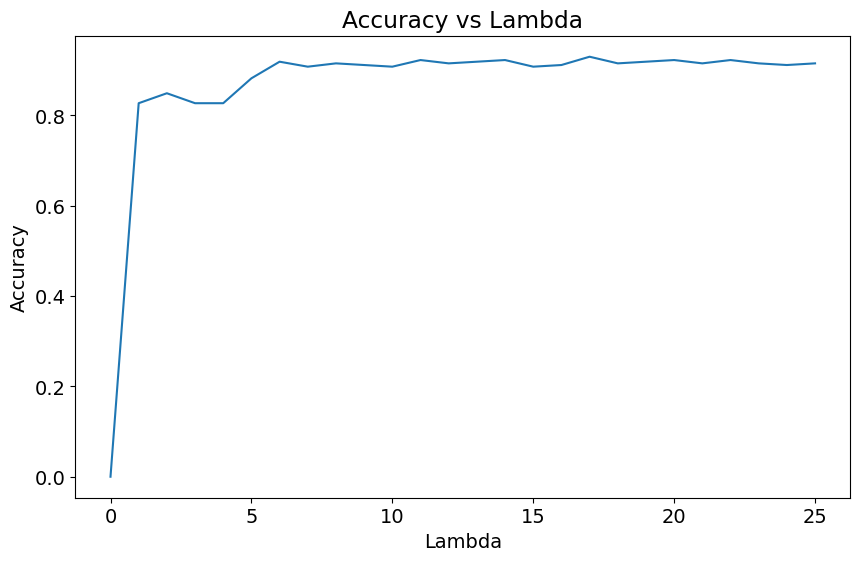

In [69]:
# Plot the accuracy vs lambda 
plt.plot(lam, list(store.values()))
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda')

By analyzing the graph, we can observe that the accuracy rate is suboptimal at approximately 0.8 of accuracy for low hardness levels (below 5). However, the accuracy rate increases to about 0.9 at a higher hardness level and remains mostly consistent beyond, even for very high hardness levels, still remaining well above 0.8 of accuracy. We know from lectures that as the hardness level increases to infinity, the problem approaches the hard margin problem. In our case, it seems that even if we increase the hardness level, the accuracy rate remains at a high level.

Conversely, at the limit of low hardness, the accuracy rate is low since the tolerance for violation is large, making it challenging for the hyperplane to fit appropriately.

Moreover, we could also add that there is a clear jump of accuracy between values of $\lambda$ lower than 5 and greater than 5. There seem to be a great improvement between those values of $\lambda$.

2.2.2

We now examine the cosine of the angle between each pair of hyperplanes for different values of $\lambda$. 

/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_19894/236727.py:5: RuntimeWarning: invalid value encountered in double_scalars
  cosine[i, j] = np.dot(w_store[lam[i]][:-1], w_store[lam[j]][:-1])/(np.linalg.norm(w_store[lam[i]][:-1])*np.linalg.norm(w_store[lam[j]][:-1]))


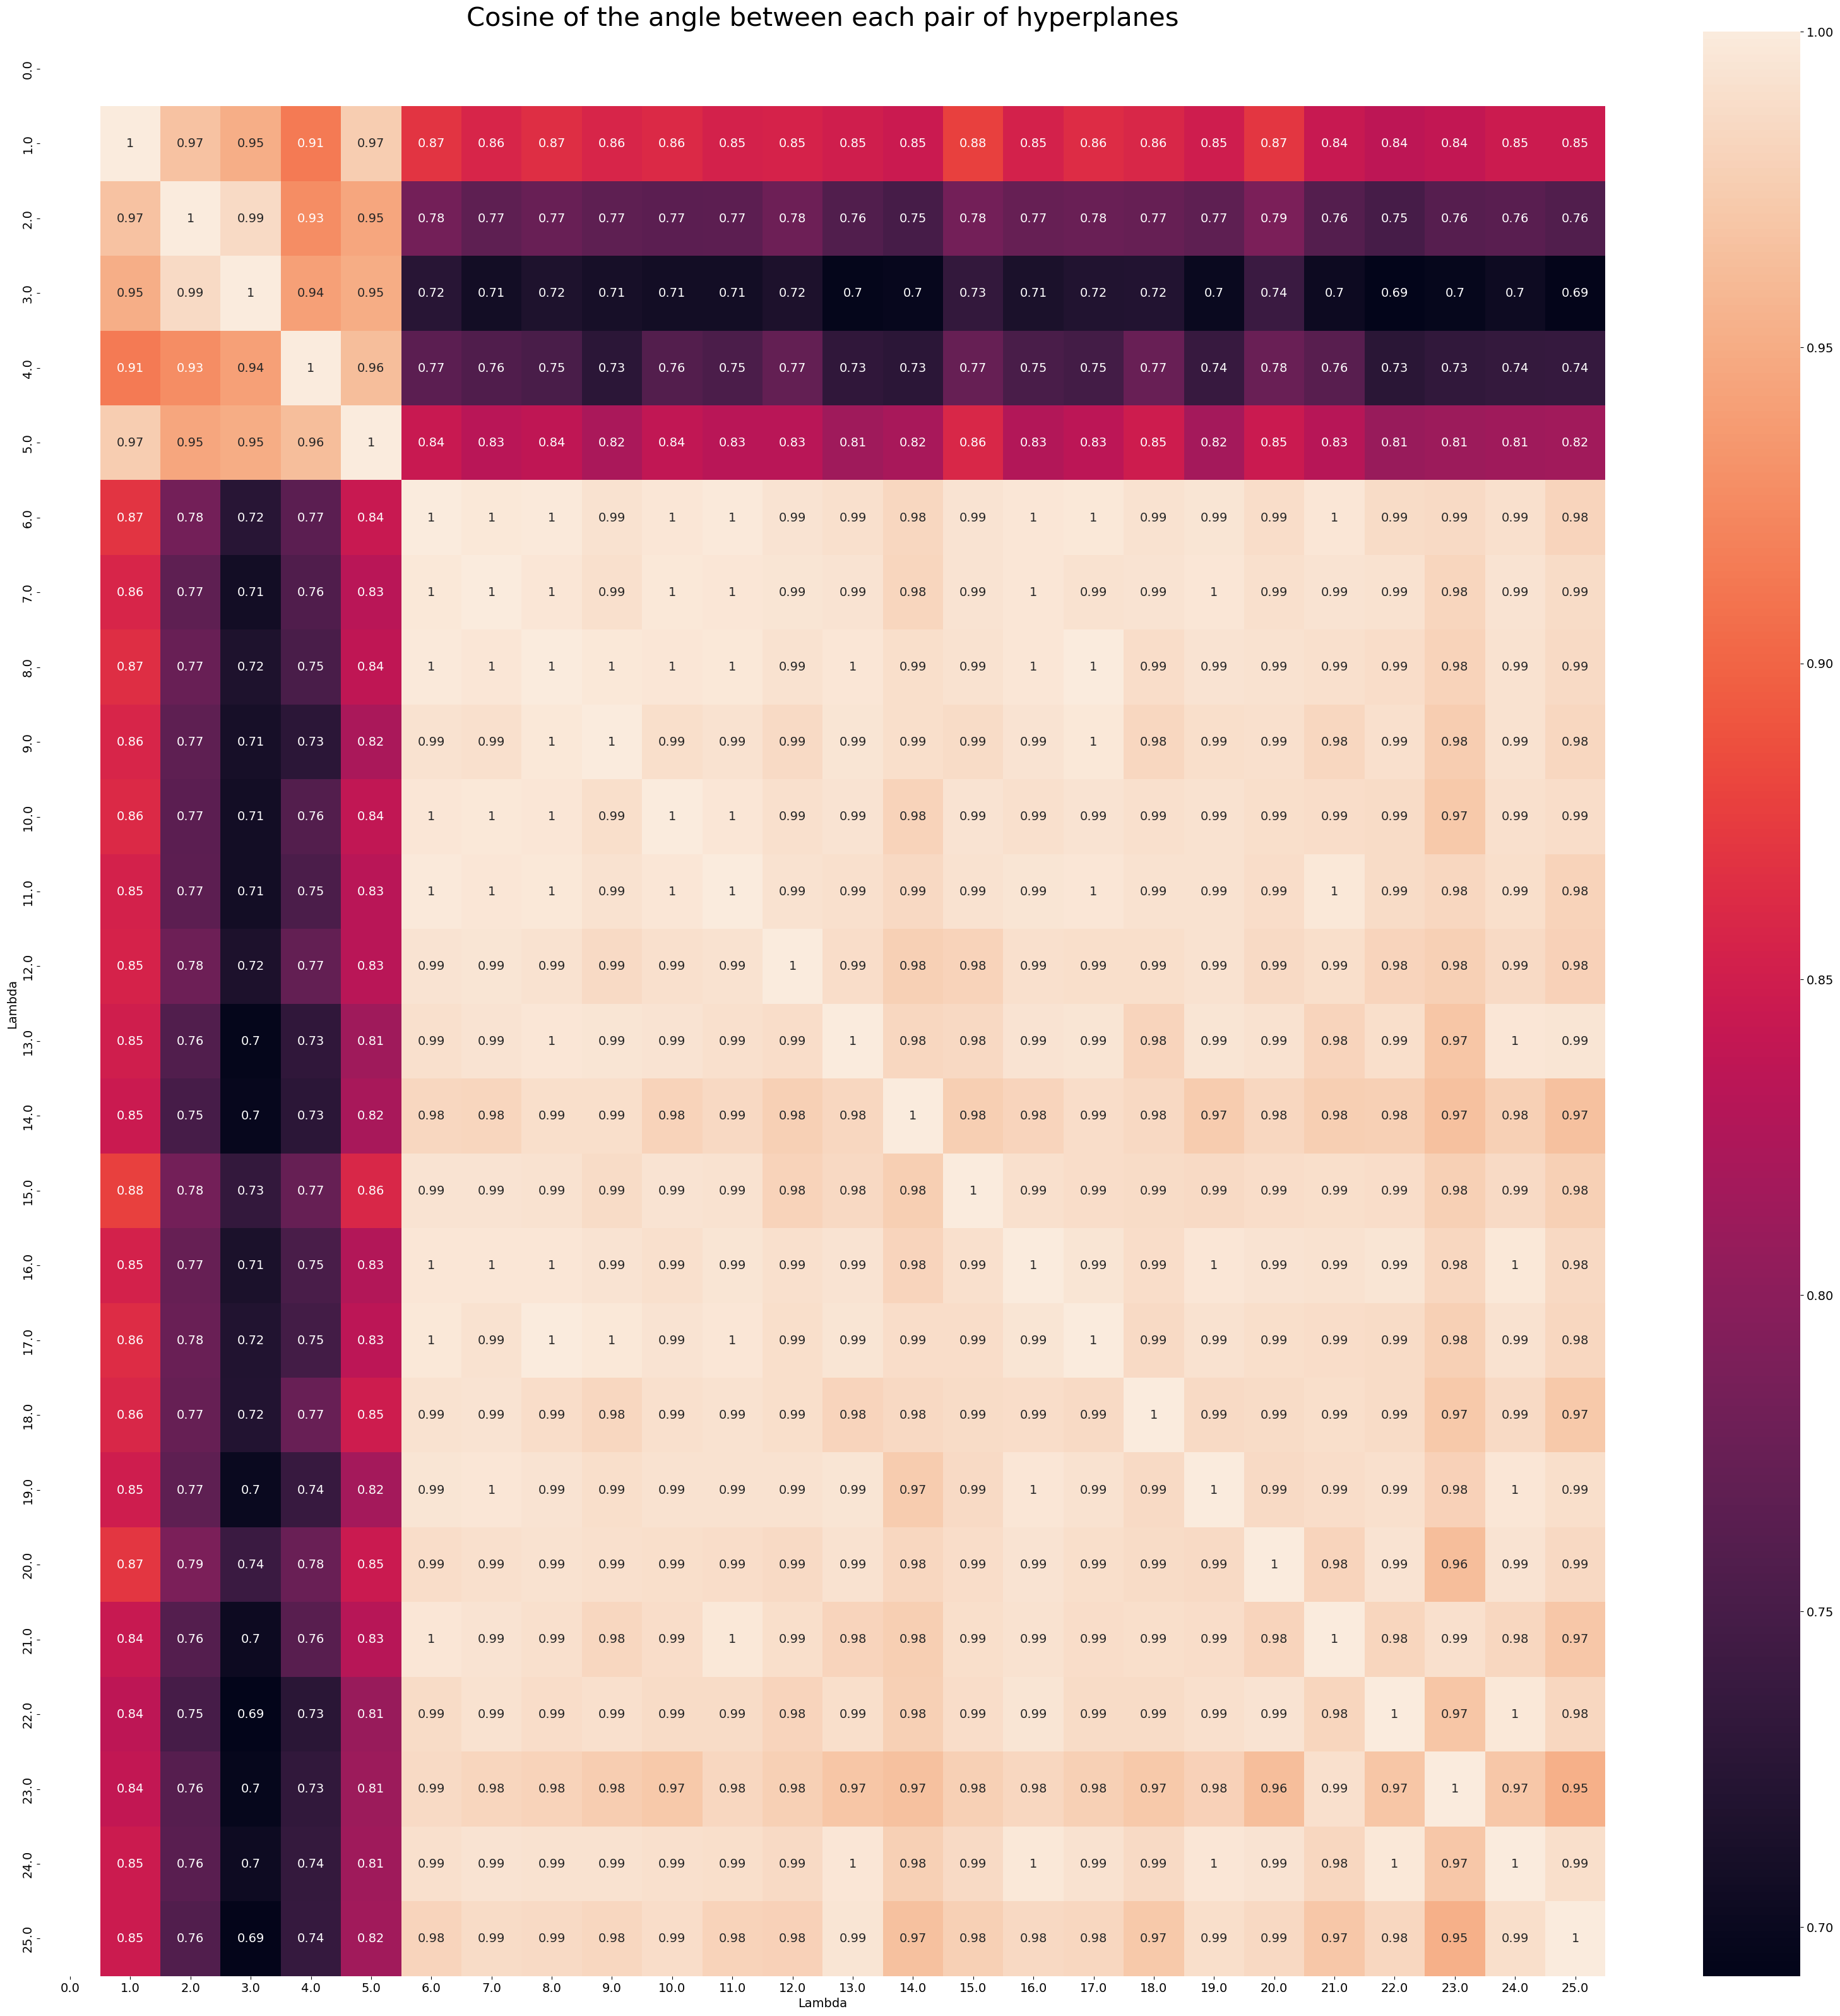

In [70]:
# Calculate the cosine of the angle between each pair of hyperplanes obtained for the different lambdas and plot the results on a square heatmap
cosine = np.zeros((len(lam), len(lam)))
for i in range(len(lam)):
    for j in range(len(lam)):
        cosine[i, j] = np.dot(w_store[lam[i]][:-1], w_store[lam[j]][:-1])/(np.linalg.norm(w_store[lam[i]][:-1])*np.linalg.norm(w_store[lam[j]][:-1]))

# Plot the heatmap with lambdas on the x and y axis
plt.figure(figsize=(40,40))
sns.heatmap(cosine, annot=True,fmt='.2g',xticklabels=w_store.keys(),yticklabels=w_store.keys())
plt.xlabel('Lambda')
plt.ylabel('Lambda')
plt.title('Cosine of the angle between each pair of hyperplanes', fontsize=30)
plt.show()

As expected, we can see a clear distinction between the cosine of the angle between hyperplanes of low hardness and high hardness. The cosine of the angle between hyperplanes of values of $\lambda$ less or equal to 5 are all close to 1, meaning that the hyperplanes are almost parallel. On the other hand, the cosine of the angle between hyperplanes of values of $\lambda$ less or equal to 5 and hyperplanes of values of $\lambda$ greater than 5 are lower and closer to 0. This means that the hyperplanes are more perpendicular to each other. However, the cosine of the angle between hyperplanes of values of $\lambda$ greater than 5 are again close to 1, meaning that the hyperplanes are almost parallel.

This result was expected as we could have seen a clear jump in accuracy as the values of $\lambda$ were increasing (close to 5). 

2.2.3

We fix the hardness hyperparameter to its optimal value and retrain the linear SVM on the full training set. We then evaluate the performance of our model on the test set. We also compute different measures such as the accuracy, precision and F-score.

In [71]:
# Fix lambda to its optimal value
l = lam[np.argmax(list(store.values()))]
print('Optimal lambda is', l)

# Train the model with the optimal lambda
w = sgd(X_train_intercept, y_train_num, regul_strength=l)
print("Training finished.")

# Evaluate the model
accuracy_svm = score(w, X_test_intercept, y_test_num)
precision_svm = precision_score(y_test_num, np.sign(X_test_intercept @ w))
recall_svm = recall_score(y_test_num, np.sign(X_test_intercept @ w))
f1_svm = f1_score(y_test_num, np.sign(X_test_intercept @ w))
print("Accuracy on test set: {}".format(accuracy_svm))
print("Precision on test set: {}".format(precision_svm))
print("Recall on test set: {}".format(recall_svm))
print("F1 score on test set: {}".format(f1_svm))


Optimal lambda is 17.0
Training finished.
Accuracy on test set: 0.9230769230769231
Precision on test set: 1.0
Recall on test set: 1.0
F1 score on test set: 1.0


By training our SVM classifier with our optimal hyperparameter, we notice that our model performs very well. It has a high out of sample accuracy, precision and F-score. This means that our model is able to predict the diabetes diagnosis with a high accuracy.

2.2.4

We implement a soft-margin kernelised SVM classifier by fixing the hardness hyperparameter to $\lambda = 10$. We report the value of the intercept for each value of $\sigma = 0.01, 0.1, 1, 2$.

In [72]:
### Sigmoid kernelised SVM ###

# First we need a function to calculate the kernel given the data #
def kernel_matrix(X1,X2,sigma):

    n1,m1 = X1.shape
    n2,m2 = X2.shape
    kernel = np.zeros((n1,n2))

    # Here we define a sigmoid Kernel #
    for i in range(n1):
        for j in range(n2):
            kernel[i,j] = np.tanh(1+sigma*np.dot(X1[i,:],X2[j,:]))
        
    return kernel

def compute_cost_kernel(u, K, y, regul_strength=1e3,intercept=0):

    # Here I define the hinge cost with the kernel trick. NB: the intercept should be kept separate #
    
    distances = 1 - (y)*(K@u + intercept)
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean()

    # calculate cost
    return 0.5 * np.dot(u,K@u) + hinge

def calculate_cost_gradient_kernel(u, K_batch, y_batch, regul_strength=1e3,intercept=0):

    # if only one example is passed
    if type(y_batch) == np.float64 or type(y_batch) == np.int32:
        y_batch = np.asarray([y_batch])
        K_batch = np.asarray([K_batch])  # gives multidimensional array
    
    distance = 1 - (y_batch * (K_batch @ u + intercept))
    dw = np.zeros(len(u))
    db = 0
    # define the gradient with the hinge loss #
    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = K_batch@u
            dbi = 0
        else:
            di = K_batch@u - (regul_strength * y_batch[ind] * K_batch[ind])
            dbi = -regul_strength*y_batch[ind]
        dw += di
        db +=dbi

    return dw/len(y_batch), db

def sgd_kernel(K, y, batch_size=32, max_iterations=4000, stop_criterion=0.001, learning_rate=1e-4, regul_strength=1e3, print_outcome=False):

    # initialise zero u and intercept
    u = np.zeros(K.shape[1])
    intercept=0
    
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # stochastic gradient descent
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        K_b, y_b = K[batch_idx], y[batch_idx]
        for ki, yi in zip(K_b, y_b):
            ascent, db = calculate_cost_gradient_kernel(u, ki, yi, regul_strength, intercept)
            u = u - (learning_rate * ascent)
            intercept = intercept - (learning_rate*db)
        
        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost_kernel(u, K, y, regul_strength, intercept)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return u, intercept
            
            prev_cost = cost
            nth += 1
    
    return u, intercept

In [73]:
store_b = {}
reg=10
for sigma in [0.01,0.1,1,2]:
    
    print('For sigma = ' + str(sigma))
    K_train = kernel_matrix(X_train_std, X_train_std, sigma)

    u,b = sgd_kernel(K_train, y_train_num, batch_size=128, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, regul_strength=reg, print_outcome=False)

    def score(u, X, y, sigma, intercept):
        K_test = kernel_matrix(X, X_train_std, sigma)
        y_preds = np.sign(K_test@u + intercept)
        
        return np.mean(y_preds == y) 

    print("Intercept is: {}".format(b))
    print("Accuracy on training set: {}".format(score(u, X_train_std, y_train_num, sigma, b)))
    print("Accuracy on test set: {}".format(score(u, X_test_std, y_test_num, sigma, b)))
    store_b[sigma] = score(u, X_test_std, y_test_num, sigma, b)
    

For sigma = 0.01
Intercept is: -0.9775999999999087
Accuracy on training set: 0.8388278388278388
Accuracy on test set: 0.8632478632478633
For sigma = 0.1
Intercept is: -1.0872999999998967
Accuracy on training set: 0.9340659340659341
Accuracy on test set: 0.9230769230769231
For sigma = 1
Intercept is: -1.4959999999998517
Accuracy on training set: 0.989010989010989
Accuracy on test set: 0.8974358974358975
For sigma = 2
Intercept is: -1.356799999999867
Accuracy on training set: 0.9963369963369964
Accuracy on test set: 0.8632478632478633


We can see that the absolute value of the intercept is increasing as $\sigma$ is increasing. This means that the intercept is moving away from the origin. This is due to the fact that the kernel function is increasing as $\sigma$ is increasing.

2.2.5

Finally, we evaluate our kernelised SVM classifier on the test set for each value of $\sigma$. We also compute different measures such as the accuracy, precision and F-score. We compare these results with the ones previously obtained in 2.2.3.

In [74]:
# Evaluate on the test set
store_evaluations = {}
for sigma in [0.01,0.1,1,2]:
    print('Sigma', sigma)
    # Train the model 
    K_train = kernel_matrix(X_train_std, X_train_std, sigma)
    b, intercept = sgd_kernel(K_train, y_train_num, batch_size=128, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, regul_strength=reg, print_outcome=False)
    # Evaluate the model
    K_test = kernel_matrix(X_test_std, X_train_std, sigma)
    y_preds = np.sign(K_test@b + intercept)
    accuracy_svm_kernel = np.mean(y_preds == y_test_num)
    precision_svm_kernel = precision_score(y_test_num, y_preds)
    recall_svm_kernel = recall_score(y_test_num, y_preds)
    f1_svm_kernel = f1_score(y_test_num, y_preds)
    store_evaluations[sigma] = [accuracy_svm_kernel, precision_svm_kernel, recall_svm_kernel, f1_svm_kernel]

Sigma 0.01


/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_19894/3333604062.py:28: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fn)


Sigma 0.1
Sigma 1
Sigma 2


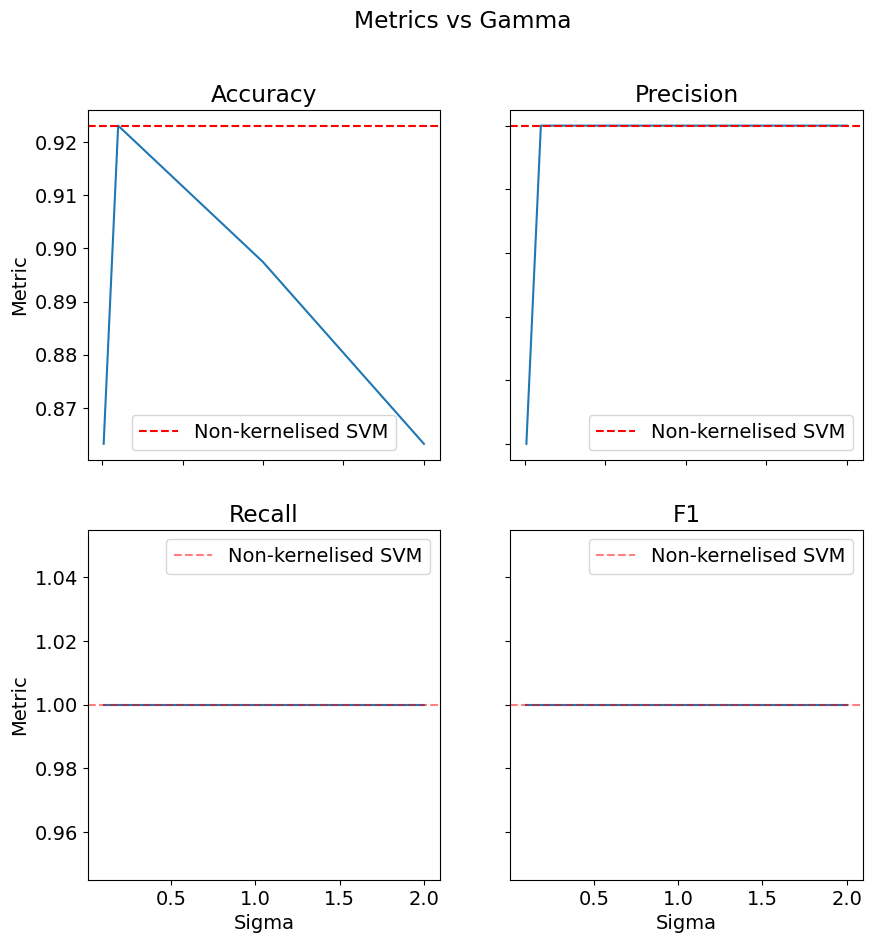

In [75]:
# Plot the metrics vs gamma in subplots with a line for previous non-kernelised SVM
sigma = [0.01,0.1,1,2]
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
fig.suptitle('Metrics vs Gamma')
axs[0, 0].plot(sigma, [store_evaluations[s][0] for s in sigma])
axs[0, 0].axhline(y=accuracy_svm, color='r', linestyle='--', label='Non-kernelised SVM')
axs[0, 0].set_title('Accuracy')
axs[0, 1].plot(sigma, [store_evaluations[s][1] for s in sigma])
axs[0, 1].axhline(y=precision_svm, color='r', linestyle='--', label='Non-kernelised SVM')
axs[0, 1].set_title('Precision')
axs[1, 0].plot(sigma, [store_evaluations[s][2] for s in sigma])
axs[1, 0].axhline(y=recall_svm, color='r', linestyle='--', label='Non-kernelised SVM', alpha=0.5)
axs[1, 0].set_title('Recall')
axs[1, 1].plot(sigma, [store_evaluations[s][3] for s in sigma])
axs[1, 1].axhline(y=f1_svm, color='r', linestyle='--', label='Non-kernelised SVM', alpha=0.5)
axs[1, 1].set_title('F1')

for ax in axs.flat:
    ax.set(xlabel='Sigma', ylabel='Metric')
    ax.legend()
    ax.label_outer()

By computing the different measures of performance and plotting them, we notice that $\sigma = 0.1$ gives us the best results for the kernelised SVM classifier. Indeed, it has the highest accuracy, precision and F-score.

On the other hand, when we compare the results of the linear SVM classifier and the kernelised SVM classifier, we notice that the linear and the kernelised SVM classifiers perform similarly. As for most values of $\sigma$, the linear SVM classifier performs better (or equally) than the kernelised SVM classifier we could assume that the data is quite well linearly separable.

Moreover, we could improve further the performance of the kernelised SVM classifier by for example: changing the kernel function, optimising the hyperparameters in more depth (e.g. using Bayesian hyperparameter optimization), etc..
This could tremendously improve the performance of the kernelised SVM classifier.

## Task 3: Mastery component  (25 marks)



#### 3.1  Bias and variance in linear regression (12 marks)

As indicated in the exercise guidelines, we want to investigate the bias and variance of the estimator of the linear regression model. In order to achieve this, we sample multiple times a synthetic dataset and compute the estimator $\beta$.

3.1.1

The first step is to generate a synthetic dataset. We use the function `sample_normal` to sample our $x_i$ and $\epsilon$ from a normal distribution to generate a dataset of size $n=100$. We use $\beta$ = 0.5 as our true value for $\beta$. We produce a scatter plot of the data and the true regression line using the prevoiusly defined function `max_lik_estimate` to compute the maximum likelihood estimate of $\beta$.

In [76]:
def sample_normal(mu, sigma, size):
    """
    Sample from a normal distribution

    Parameters:
        mu : float
            Mean of the normal distribution
        sigma : float
            Standard deviation of the normal distribution
        size : int
            Number of samples to draw

    Returns:
        samples : np.array
            Samples from the normal distribution
    """
    return np.random.normal(mu, sigma, size)


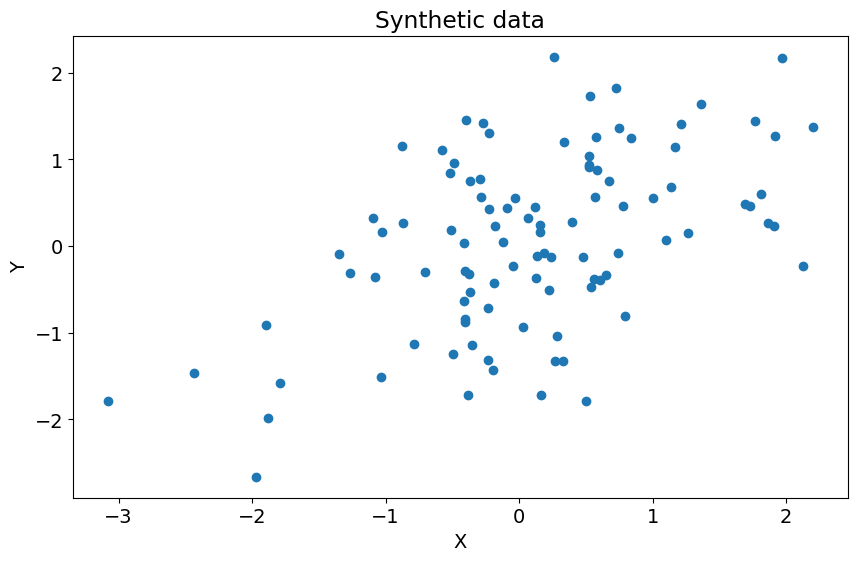

In [77]:
# Create a synthetic dataset with a linear relationship (N = 100)
N = 100
X = sample_normal(0, 1, N)
Y = 0.5*X + sample_normal(0, 1, N)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic data")
plt.show()

Beta:  [0.52759106]


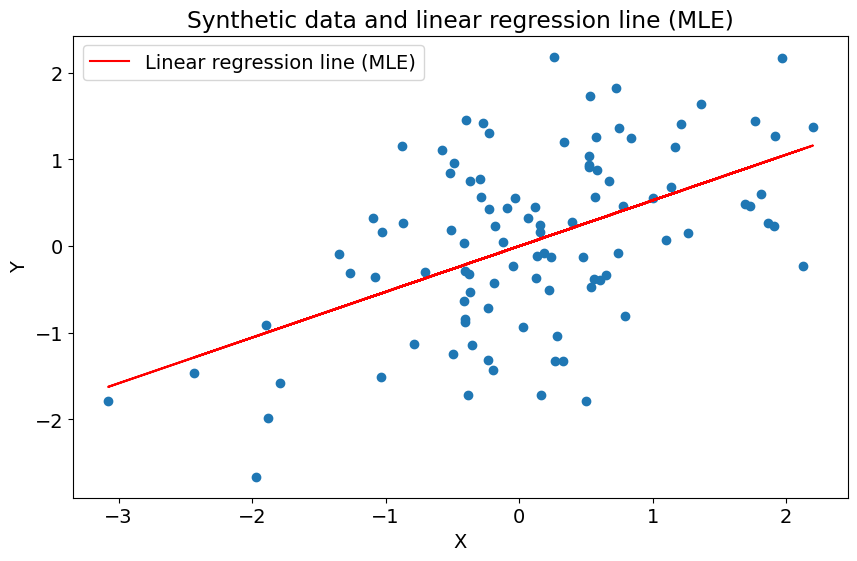

In [78]:
# Apply the linear regression model to the data
beta = max_lik_estimate(X.reshape(-1,1), Y)
print("Beta: ", beta)

# Plot the data and the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.plot(X, beta[0]*X, color="red", label="Linear regression line (MLE)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Synthetic data and linear regression line (MLE)")
plt.show()

We have produced a linear regression for our synthetic data and our first estimate of beta is around 0.44.

3.1.2

In this question, we want to compute the bias and variance of the estimator of $\beta$ by sampling 100 times a synthetic dataset and computing the estimator $\beta$ for each sample. We use the function `max_lik_estimate` to compute the maximum likelihood estimate of $\beta$ for each sample. We then compute the bias and variance of the estimator of $\beta$. 

In [79]:
# Evaluate bias and variance of the linear regression estimator
true_beta = 0.5
store_beta = np.array([])
for i in range(100): 
    X = sample_normal(0, 1, N)
    Y = 0.5*X + sample_normal(0, 1, N)
    beta = max_lik_estimate(X.reshape(-1,1), Y)
    store_beta = np.append(store_beta, beta[0])

print("Bias: ", np.mean(store_beta) - true_beta)
print("Variance: ", np.var(store_beta))
print("Mean squared error: ", np.mean((store_beta - true_beta) ** 2))

Bias:  0.0019590061061969255
Variance:  0.011308496281205211
Mean squared error:  0.011312333986129328


We can see that both the bias and the variance are very small. This is expected as the sample size is large and the true value of $\beta$ is close to the maximum likelihood estimate of $\beta$. As the Mean Squared Error (MSE) is the sum of the bias and the variance, we can see that the MSE is very small as well.

3.1.3

We now repeat the previous question but for increasing sample sizes $N$. We can see that the bias and variance decrease as the sample size increases. This is expected as the sample size increases, the estimator of $\beta$ becomes more accurate.

N:  1000
Bias:  -0.001139127353021463
Variance:  0.0008881984308712472
MSE:  0.0008894960419976491
N:  10000
Bias:  -7.279889425260144e-05
Variance:  0.00010425734287547851
MSE:  0.0001042626425544829
N:  100000
Bias:  0.00010991109955016398
Variance:  1.0846677178503094e-05
MSE:  1.085875762830742e-05


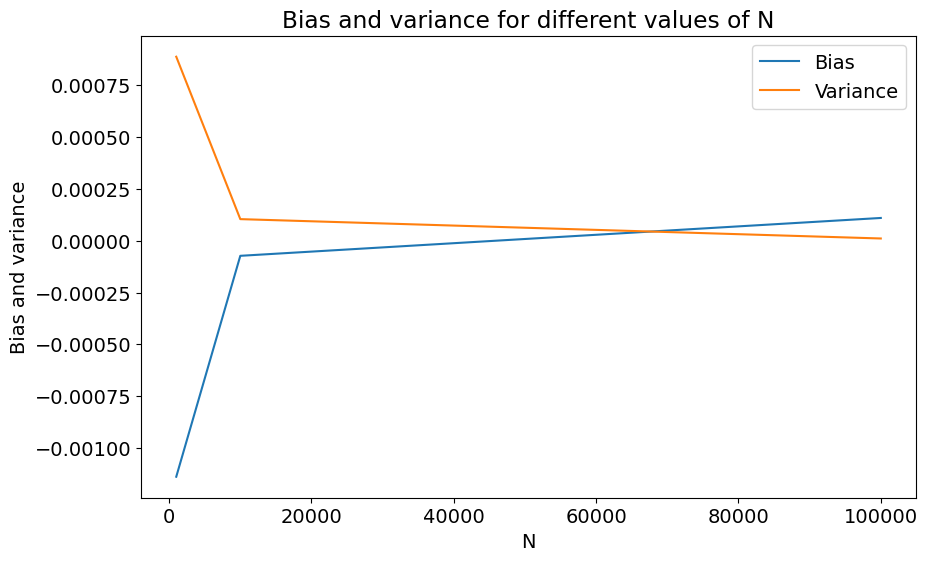

In [80]:
# Evaluate bias and variance of the linear regression estimator for N = 100, 1000, 10000, 100000
N_values = [1000, 10000, 100000]
bias = []
variance = []
store = {}
for N in N_values:
    store_beta = np.array([])
    for i in range(100):
        # Generate 100 samples from the data generating distribution
        X = sample_normal(0, 1, N)
        Y = 0.5*X + sample_normal(0, 1, N)
        # Compute the linear regression estimator
        beta = max_lik_estimate(X.reshape(-1,1), Y)
        # Store the estimator
        store_beta = np.append(store_beta, beta[0])
    store[N] = (np.mean(store_beta) - true_beta, np.var(store_beta), np.mean((store_beta - true_beta) ** 2))
    print("N: ", N)
    print("Bias: ", np.mean(store_beta) - true_beta)
    print("Variance: ", np.var(store_beta))
    print("MSE: ", np.mean((store_beta - true_beta) ** 2))

# Plot the bias and variance for different values of N
plt.figure(figsize=(10, 6))
plt.plot(N_values, [x[0] for x in store.values()], label="Bias")
plt.plot(N_values, [x[1] for x in store.values()], label="Variance")
plt.xlabel("N")
plt.ylabel("Bias and variance")
plt.legend()
plt.title("Bias and variance for different values of N")
plt.show()

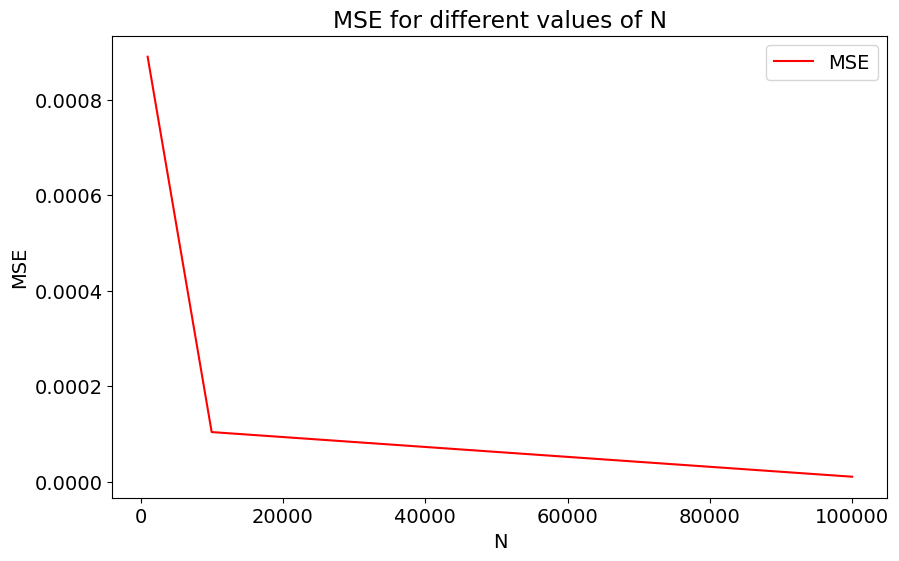

In [81]:
# Plot MSE for different values of N
plt.figure(figsize=(10, 6))
plt.plot(N_values, [x[2] for x in store.values()], label="MSE", color="red")
plt.xlabel("N")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE for different values of N")
plt.show()

As expected, the bias and variance decrease as the sample size increases. This is because the estimator of $\beta$ becomes more accurate as the sample size increases. The MSE also decreases as the sample size increases. 

As stated by the Central Limit Theorem (CLT), the distribution of the estimator of $\beta$ converges to a normal distribution as the sample size increases with a mean equal to the true value of $\beta$ and a variance that approaches zero as the sample size n approaches infinity. This is why the bias and variance decrease as the sample size increases.

#### 3.2  Comparison between Logistic Regression and Naive Bayes (13 marks)

In this exercise, we want to compare the performance of the logistic regression and the Naive Bayes classifiers on the same dataset. We also want to investigate how both models perform when taking bootstrapped subsamples of the training data. Finally, we want to analyze the performance of the logistic regression classifier when using a weighted loss function.

3.2.1

We first reload, standardise and then split again the dataset into a training set and a test set. We then train the logistic regression and the Naive Bayes classifiers on the training set and evaluate their performance on the test set.

In [82]:
# Reload the training data
diabetes_df = pd.read_csv("diabetes_samples.csv", sep=",", decimal=".")

X_train = diabetes_df.drop("diabetes", axis=1)
# Transform columns with , to .
X_train = X_train.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
# Convert to float
X_train = X_train.astype(float)
print("X_train shape: ", X_train.shape)

y_train = diabetes_df["diabetes"]
# Convert to 0 and 1 
y_train = y_train.apply(lambda x: 0 if x == "No diabetes" else 1)
print("y_train shape: ", y_train.shape)

# Reload the test data
diabetes_test_df = pd.read_csv("diabetes_test.csv", sep=",", decimal=".")
diabetes_test_df.head()

X_test = diabetes_test_df.drop("diabetes", axis=1)
# Transform columns with , to .
X_test = X_test.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
# Convert to float
X_test = X_test.astype(float)
print("X_test shape: ", X_test.shape)

y_test = diabetes_test_df["diabetes"]
# Convert to 0 and 1 
y_test = y_test.apply(lambda x: 0 if x == "No diabetes" else 1)
print("y_test shape: ", y_test.shape)

X_train shape:  (273, 14)
y_train shape:  (273,)
X_test shape:  (117, 14)
y_test shape:  (117,)


In [83]:
# Combine both datasets and standardise
X = np.concatenate((X_train, X_test), axis=0)
X_standardised = standardise(X)

# Split the standardised dataset into train and test
X_train_standardised = X_standardised[:X_train.shape[0], :]
X_test_standardised = X_standardised[X_train.shape[0]:, :]

In [84]:
### Logistic regression ###
def logistic(x):
  """
  Logistic function

  Parameters:
  x : float
      Input value

  Returns:
  float
      Output value
  """
  return 1. / (1. + np.exp(-x))

def predict_log(X, beta, beta_0):
  """
  Predicts the probability of a sample belonging to class 1

  Parameters:
  X : array
      Input data
  beta : array
      Linear regression coefficients
  beta_0 : float  
      Intercept

  Returns:
  array
      Predicted probabilities
  """
  y_log = logistic(X @ beta + beta_0)
  return y_log.squeeze()

def train_log(X, y, n_iter=1000, lr=0.01):
  """
  Trains a logistic regression model

  Parameters:
  X : array
      Input data
  y : array
      Target values
  n_iter : int 
      Number of iterations
  lr : float
      Learning rate
  
  Returns:
  tuple
      Linear regression coefficients and intercept
  """
  beta = np.zeros(X.shape[1])
  beta_0 = 0
  for i in range(n_iter):
    y_log = predict_log(X, beta, beta_0)
    beta = beta + lr * X.T @ (y - y_log)
    beta_0 = beta_0 + lr * (y - y_log).sum()
  return beta, beta_0

# Fit the model
beta, beta_0 = train_log(X_train_standardised, y_train)

# In-sample accuracy
y_pred = predict_log(X_train_standardised, beta, beta_0)
y_pred = (y_pred > 0.5).astype(int)
print("In-sample accuracy: ", (y_pred == y_train).mean())
logistic_in_sample = (y_pred == y_train).mean()

# Out-of-sample accuracy
y_pred = predict_log(X_test_standardised, beta, beta_0)
y_pred = (y_pred > 0.5).astype(int)
print("Out-of-sample accuracy: ", (y_pred == y_test).mean())
logistic_out_sample = (y_pred == y_test).mean()

In-sample accuracy:  0.9267399267399268
Out-of-sample accuracy:  0.9316239316239316


In [85]:
### Naive Bayes Classifier (with Gaussian features) ###
def fit(X, y, priors=None):
    """
    Fits a Naive Bayes classifier

    Parameters:
    X : array
        Input data
    y : array
        Target values
    priors : array
        Prior probabilities for each class

    Returns:
    tuple
        Mean, variance, log priors and classes
    """
    classes = np.unique(y)
    n_classes = len(classes)
    n_features = X.shape[1]
    mean = np.zeros((n_classes, n_features))
    var = np.zeros((n_classes, n_features))
    priors = np.zeros(n_classes)

    for i, c in enumerate(classes):
        priors[i] = np.sum(y == c) / len(y)
        X_c = X[y == c]
        mean[i, :] = np.mean(X_c, axis=0)
        var[i, :] = np.var(X_c, axis=0)
    
    log_priors_ = np.log(priors)

    return mean, var, log_priors_, classes

def predict(X, mean, var, log_priors_, classes):
    """
    Predicts the class of a sample

    Parameters:
    X : array
        Input data
    mean : array
        Mean of each feature for each class
    var : array 
        Variance of each feature for each class
    log_priors_ : array
        Log priors for each class
    classes : array
        Classes

    Returns:
    array
        Predicted classes
    """
    y_pred = []
    for x in X:
        posterior = []
        for c in classes:
            prior = log_priors_[c]
            for val in var[c]:
                if val == 0:
                    var[c] = 1e-5
            likelihood = np.sum(np.log(1 / np.sqrt(2 * np.pi * var[c])) - 0.5 * ((x - mean[c]) ** 2 / var[c]))
            posterior.append(prior + likelihood)
        y_pred.append(classes[np.argmax(posterior)])
    return y_pred

# Fit the model and predict the classes
mean, var, log_priors_, classes = fit(X_train_standardised, y_train)
y_pred_train = predict(X_train_standardised, mean, var, log_priors_, classes)
y_pred = predict(X_test_standardised, mean, var, log_priors_, classes)

# Calculate the accuracy
print("In-sample accuracy: ", (y_pred_train == y_train).mean())
print("Out-of-sample accuracy: ", (y_pred == y_test).mean())

naive_in_sample = (y_pred_train == y_train).mean()
naive_out_sample = (y_pred == y_test).mean()

In-sample accuracy:  0.9084249084249084
Out-of-sample accuracy:  0.8888888888888888


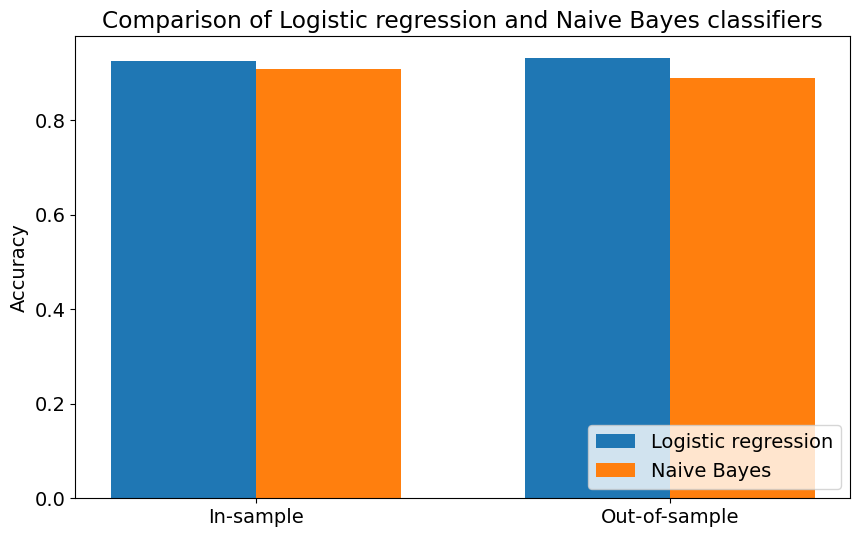

In [86]:
# Plot the results in a bar chart to compare the two models
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(2)
width = 0.35
ax.bar(x - width/2, [logistic_in_sample, logistic_out_sample], width, label="Logistic regression")
ax.bar(x + width/2, [naive_in_sample, naive_out_sample], width, label="Naive Bayes")
ax.set_xticks(x)
ax.set_xticklabels(["In-sample", "Out-of-sample"])
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Logistic regression and Naive Bayes classifiers")
ax.legend(loc="lower right")
plt.show()


We have trained the logistic regression and the Naive Bayes classifier on the training set and evaluated their performance on the test set. We can see that the logistic regression classifier performs better than the Naive Bayes classifier. The logistic regression classifier has a better accuracy on both the training and the test sets. For example, the logistic regression classifier has an accuracy of 0.93 on the test set whereas the Naive Bayes classifier only has an accuracy of 0.89 on the test set.
This is expected as the logistic regression classifier is more flexible than the Naive Bayes classifier.

3.2.2

We now want to investigate how both models perform when taking bootstrapped subsamples of the training data. We generate bootstrapped subsamples of the training set of different sizes $M'$. We will then train the logistic regression and the Naive Bayes classifiers on the bootstrapped subsample and evaluate their performance on the test set. We will repeat this process 10 times and compute the average accuracy of the logistic regression and the Naive Bayes classifiers on the test set for each $M'$. We will then plot the average accuracy of the logistic regression and the Naive Bayes classifiers on the test set as a function of the size of the bootstrapped subsample.

In [87]:
# Bootstraping the training data and evaluate performance for different bootstrap sizes
bootstrap_sizes = [10, 30, 50, 100, 150, 200, 250, 273] # Bootstrap sizes M'
store_nb = []
store_log = []
save_indices = {}

for M_prime in bootstrap_sizes:
    store_boot_log = []
    store_boot_nb = []
    save_indices_M_prime = []
    for k in range(10):
        # Bootstrap the training data
        indices = np.random.choice(X_train_standardised.shape[0], M_prime, replace=True)
        save_indices_M_prime.append(indices)
        X_train_bootstrap = X_train_standardised[indices, :]
        y_train_bootstrap = y_train[indices]

        # Logistic regression
        beta, beta_0 = train_log(X_train_bootstrap, y_train_bootstrap)
        y_pred = predict_log(X_test_standardised, beta, beta_0)
        y_pred = (y_pred > 0.5).astype(int)
        store_boot_log.append((y_pred == y_test).mean())

        # Naive Bayes model
        mean, var, log_priors_, classes = fit(X_train_bootstrap, y_train_bootstrap)
        y_pred = predict(X_test_standardised, mean, var, log_priors_, classes)
        store_boot_nb.append((y_pred == y_test).mean())

    # Store the mean of the performance of the 10 bootstrapped models
    store_log.append(np.mean(store_boot_log))
    store_nb.append(np.mean(store_boot_nb))
    save_indices[M_prime] = save_indices_M_prime
        


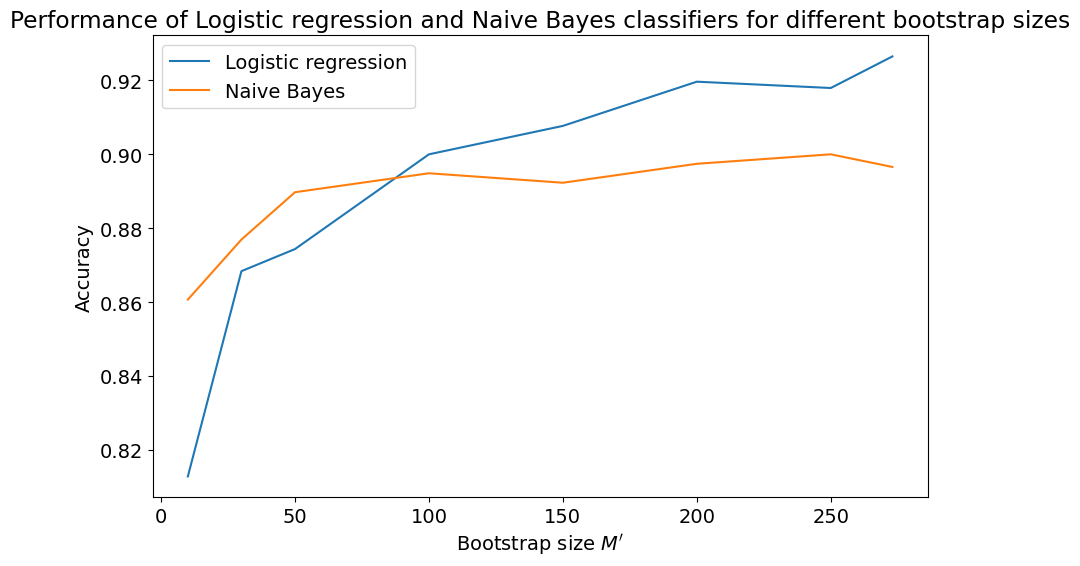

In [88]:
# Plot the performance of the Logistic regression and Naive Bayes 
plt.figure(figsize=(10, 6))
plt.plot(bootstrap_sizes, store_log, label="Logistic regression")
plt.plot(bootstrap_sizes, store_nb, label="Naive Bayes")
plt.xlabel("Bootstrap size $M'$")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Performance of Logistic regression and Naive Bayes classifiers for different bootstrap sizes")
plt.show()

We can easily notice that the logistic regression classifier performs better than the Naive Bayes classifier. This is expected as the logistic regression classifier is more flexible than the Naive Bayes classifier. We can also notice that the logistic regression classifier performs better when using large bootstrapped subsamples. This is expected as the larger the bootstrapped subsample, the more data the logistic regression classifier has to learn from. However, there seems to be a limit to the size of the bootstrapped subsample after which the out of sample accuracy of the models stops increasing. This is because both models start overfitting the data when using large bootstrapped subsamples. Both methods attain stop providing a good generalization of the data when using large bootstrapped subsamples. For the logistic regression classifier this limit is around $M' = 200$ and for the Naive Bayes classifier this limit is around $M' = 250$.

Beyond this sample sizen regime each method starts to overfit the data and the out of sample accuracy of the models starts to decrease.

3.2.3

As we have seen in the previous task, the dataset is heavily unbalanced. We now want to investigate how the logistic regression classifier performs when using a weighted loss function. We will consider similar weights as the one we used previously in the coursework. We will then train the logistic regression classifier on the training set and evaluate its performance on the test set. Moreover, we will also reproduce the previous task and investigate how the logistic regression classifier performs when taking bootstrapped subsamples of the training data. We will then compare the performance of the logistic regression classifier when using a weighted loss function and when not using a weighted loss function.

In [89]:
# Introduce weights for each data point that balance the diagnosis outcomes
# Compute the frequencies of diagnosis outcomes
freq_diabetes = diabetes_df["diabetes"].value_counts()[1]/ len(diabetes_df)
print("Frequency of diabetes: ", freq_diabetes)
weights = np.ones(len(y_train))
weights[y_train == 1] = 1/(2*44)
weights[y_train == 0] = 1/(2*229)
print("Check that sum of weights is equal to one: ", np.sum(weights))

Frequency of diabetes:  0.16117216117216118
Check that sum of weights is equal to one:  0.9999999999999998


In [90]:
def train_log(X, y, n_iter=1000, lr=0.01):
  """
  Trains a logistic regression model

  Parameters:
  X : array
      Input data
  y : array
      Target variable
  n_iter : int
      Number of iterations
  lr : float
      Learning rate

  Returns:
  array
      Model coefficients
  float
      Intercept
  """
  beta = np.zeros(X.shape[1])
  beta_0 = 0
  for i in range(n_iter):
    y_log = predict_log(X, beta, beta_0)
    beta = beta + lr * X.T @ (y - y_log)
    beta_0 = beta_0 + lr * (y - y_log).sum()
  return beta, beta_0

In [91]:
# Use weights to obtain a weighted loss function for the logistic regression classifier
def train_log_weighted(X, y, weights, n_iter = 1000, lr = 0.01):
    """
    Trains a logistic regression model

    Parameters:
    X : array
        Input data
    y : array
        Target variable
    weights : array
        Weights for each data point
    n_iter : int
        Number of iterations
    lr : float
        Learning rate
    
    Returns:
    array
        Model coefficients
    float
        Intercept
    """
    beta = np.zeros(X.shape[1])
    beta_0 = 0
    for i in range(n_iter):
        y_log = predict_log(X, beta, beta_0)
        beta = beta + lr * X.T @ ((y - y_log) * weights)
        beta_0 = beta_0 + lr * ((y - y_log) * weights).sum()
    return beta, beta_0
    

beta, beta_0 = train_log_weighted(X_train_standardised, y_train, weights)

#In-sample accuracy
y_pred = predict_log(X_train_standardised, beta, beta_0)
y_pred = (y_pred > 0.5).astype(int)
print("In-sample accuracy: ", (y_pred == y_train).mean())

#Out-of-sample accuracy
y_pred = predict_log(X_test_standardised, beta, beta_0)
y_pred = (y_pred > 0.5).astype(int)
print("Out-of-sample accuracy: ", (y_pred == y_test).mean())

In-sample accuracy:  0.8754578754578755
Out-of-sample accuracy:  0.9316239316239316


In [92]:
# Reproduce the bootstrap with the weighted logistic regression classifier with the same bootstrap indices
bootstrap_sizes = [10, 30, 50, 100, 150, 200, 250, 273]
store_log_weighted = []

for M_prime in save_indices.keys():
    store_boot_log = []
    for k in range(10):
        # Bootstrap the training data
        indices = save_indices[M_prime][k]
        X_train_bootstrap = X_train_standardised[indices, :]
        y_train_bootstrap = y_train[indices]
        weights_bootstrap = weights[indices]

        # Logistic regression
        beta, beta_0 = train_log_weighted(X_train_bootstrap, y_train_bootstrap, weights_bootstrap)
        y_pred = predict_log(X_test_standardised, beta, beta_0)
        y_pred = (y_pred > 0.5).astype(int)
        store_boot_log.append((y_pred == y_test).mean())

    store_log_weighted.append(np.mean(store_boot_log))

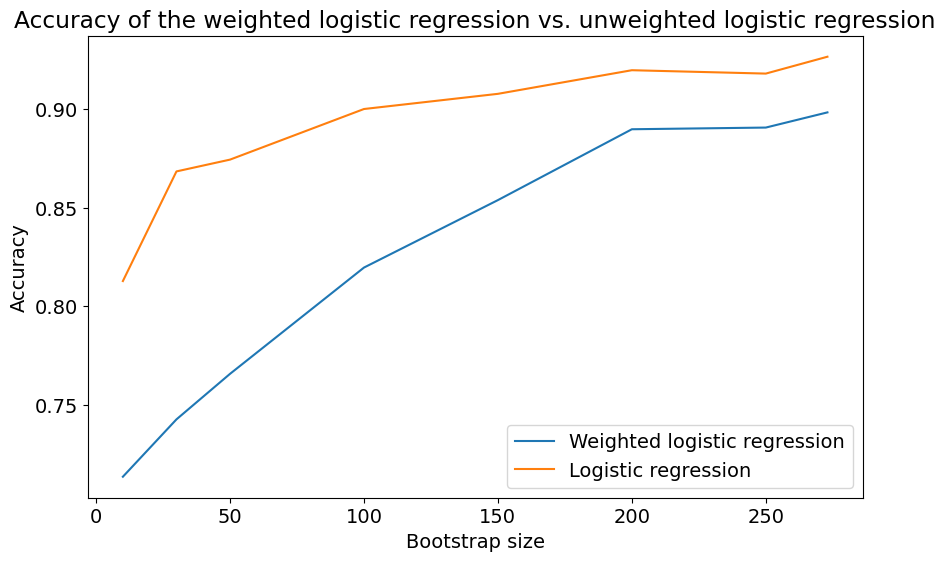

In [93]:
# Plot the accuracy for the weighted logistic regression classifier and the non-weighted logistic regression classifier
plt.plot(bootstrap_sizes, store_log_weighted, label="Weighted logistic regression")
plt.plot(bootstrap_sizes, store_log, label="Unweighted logistic regression")
plt.xlabel("Bootstrap size")
plt.ylabel("Accuracy")
plt.title("Accuracy of the weighted logistic regression vs. unweighted logistic regression")
plt.legend()
plt.show()

From the plot above, we can see that the logistic regression classifier performs better when using an unweighted loss function. This is expected as the dataset is heavily unbalanced. The logistic regression classifier is more likely to predict the majority class when using an unweighted loss function. This is why the logistic regression classifier performs better when using an unweighted loss function.

Indeed, we could have a closer look at the predictions made by both models (please see the code and results below).

On the other hand, the weighted logistic regression classifer seem to less overfit the data when using bootstrapped subsamples. This is because the weighted logistic regression classifier is more likely to predict the minority class when using a weighted loss function. We could guess that the weighted logisitic regression would perform better when being tested on a balanced dataset. 

In [94]:
def confusion_matrix(y_pred, y_test):
    """
    Computes the confusion matrix for a binary classification problem

    Parameters:
    y_pred : array
        Predicted values
    y_test : array
        True values

    Returns:
    array
        Confusion matrix
    """
    matrix = np.zeros((2,2))
    for true, pred in zip(y_test,y_pred):
        if true == 1 and pred == 1:
            matrix[0,0] += 1
        if true == 0 and pred == 1:
            matrix[0,1] += 1
        if true == 1 and pred == 0:
            matrix[1,0] += 1
        if true == 0 and pred == 0:
            matrix[1,1] += 1
    return matrix

In [95]:
# Closer look at the predictions for the weighted logistic regression classifier
beta, beta_0 = train_log_weighted(X_train_standardised, y_train, weights)
y_pred = predict_log(X_test_standardised, beta, beta_0)
y_pred = (y_pred > 0.5).astype(int)
print("Accuracy: ", (y_pred == y_test).mean())
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))


Accuracy:  0.9316239316239316
Confusion matrix: 
[[13.  3.]
 [ 5. 96.]]


In [96]:
# Closer look at the predictions for the unweighted logistic regression classifier
beta, beta_0 = train_log(X_train_standardised, y_train)
y_pred = predict_log(X_test_standardised, beta, beta_0)
y_pred = (y_pred > 0.5).astype(int)
print("Accuracy: ", (y_pred == y_test).mean())
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))


Accuracy:  0.9316239316239316
Confusion matrix: 
[[10.  6.]
 [ 2. 99.]]


As expected, the unweighted logistic regression classifier seems to classify more observations as the majority class. This is because the unweighted logistic regression classifier is more likely to predict the majority class when using an unweighted loss function. On the other hand, the weighted logistic regression classifier seems to classify more observations as the minority class. This is because the weighted logistic regression classifier is more likely to predict the minority class when using a weighted loss function. We could expect the weighted logistic regression classifier to perform better when being tested on a balanced dataset. However, we would need to test this hypothesis on a balanced dataset to confirm this.

In [97]:
# Make the test dataset balanced 
X_test_balanced = X_test_standardised[y_test == 1]
y_test_balanced = y_test[y_test == 1]
X_test_balanced = np.concatenate((X_test_balanced, X_test_standardised[y_test == 0][:len(y_test_balanced)]), axis=0)
y_test_balanced = np.concatenate((y_test_balanced, y_test[y_test == 0][:len(y_test_balanced)]), axis=0)

# Check that it is balanced
print("Number of positive examples: ", (y_test_balanced == 1).sum())
print("Number of negative examples: ", (y_test_balanced == 0).sum())

# Closer look at the predictions for the weighted logistic regression classifier on the balanced test dataset
beta, beta_0 = train_log_weighted(X_train_standardised, y_train, weights)
y_pred = predict_log(X_test_balanced, beta, beta_0)
y_pred = (y_pred > 0.5).astype(int)
print("\nAccuracy of the weighted logistic regression classifier: ", (y_pred == y_test_balanced).mean())
print("Confusion matrix of the weighted logistic regression classifier: ")
print(confusion_matrix(y_test_balanced, y_pred))

# Closer look at the predictions for the unweighted logistic regression classifier on the balanced test dataset
beta, beta_0 = train_log(X_train_standardised, y_train)
y_pred = predict_log(X_test_balanced, beta, beta_0)
y_pred = (y_pred > 0.5).astype(int)
print("\nAccuracy of the unweighted logistic regression classifier: ", (y_pred == y_test_balanced).mean())
print("Confusion  matrix of the unweighted logistic regression classifier: ")
print(confusion_matrix(y_test_balanced, y_pred))

Number of positive examples:  16
Number of negative examples:  16

Accuracy of the weighted logistic regression classifier:  0.90625
Confusion matrix of the weighted logistic regression classifier: 
[[13.  3.]
 [ 0. 16.]]


/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_19894/2087546345.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test_balanced = np.concatenate((y_test_balanced, y_test[y_test == 0][:len(y_test_balanced)]), axis=0)



Accuracy of the unweighted logistic regression classifier:  0.8125
Confusion  matrix of the unweighted logistic regression classifier: 
[[10.  6.]
 [ 0. 16.]]


This quick check confirms our previous hypothesis. Indeed, we can see that the weighted logistic regression classifier performs better when being tested on a balanced dataset. This is because the weighted logistic regression classifier is more likely to predict the minority class when using a weighted loss function. This is why the weighted logistic regression classifier performs better when being tested on a balanced dataset. However, we could still argue that this analysis was done on a very small dataset and that we would need to test this hypothesis on a larger dataset to confirm this. 